<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;">TESLA</p>
<p style="background-color:#ffffff;font-family:candaralight;color:#B0B0B0;font-size:150%;text-align:center;border-radius:10px 10px;">DỰ ĐOÁN GIÁ CỔ PHIẾU VỚI PYTHON</p>

<div style="width:100%;text-align: center;"> <img align=middle src="../asset/image/logo-tesla.jpg" alt="Heat beating" > </div>




#### Dự án "Dự đoán giá cổ phiếu với python" sử dụng dữ liệu trong vòng 5 năm của các mã cổ phiếu khác nhau trong lĩnh vực sản xuất ô tô trên thể giới.
#### - Ngôn ngữ sử dụng : Python
#### - Mô hình sử dụng trong dự án: 
* [Simple Moving Average](#1)
   - [Naive](#1.1)
   - [Window 3](#1.2)
   - [Window 6](#1.3)
* [Simple Exponential Smoothing](#2)
   - [Alpha=0.1](#2.1)
   - [Alpha tối ưu](#2.2)
* [Holt Winter Model](#3)
   - [Hệ số chuẩn](#3.1)
   - [Hệ số tối ưu](#3.2)
   
 **<span style="color:red;"> Mong mọi người xem xét và cho ý kiến về Notebook.</span>**


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#3498db; font-family:'Candara Light', sans-serif; color:#ffffff; font-size:175%; text-align:center; border-radius:10px; padding:10px;">Các mục chính</p>


* [1. Data OverView](#1)
    
    - [Import Thư viện](#1.1)
    
    - [Tải dataset](#1.2)
    
    - [Mô tả dữ liệu](#1.3)
        
* [2. Tiền xử lý dữ liệu (Data Preprocessing)](#2)   

    - [Làm sạch dữ liệu (Data cleaning)](#2.1)      
        
    - [Chuyển dạng dữ liệu (Data transformation)](#2.2)

* [3. Thống kê mô tả (Descriptive statistics)](#3)
    
    - [Câu hỏi thống kê](#3.1)

    - [Kết luận](#3.2)

* [4. Phân tích chuỗi thời gian (time series analysis)](#4)
    
    - [Tính mùa vụ, xu hướng và chu kỳ](#4.1)

    - [So sánh với các cổ phiếu cùng ngành (theo giai đoạn)](#4.2) 
* [5. Mô hình (Modeling)](#5)
    
    - [Moving Average naive](#5.1)

    - [Moving Average khoảng trượt 3](#5.2) 
    
    - [Moving Average khoảng trượt 6](#5.3) 

    - [Simple Exponential Smoothing với alpha = 0.1](#5.4) 

    - [Simple Exponential Smoothing với alpha tối ưu](#5.5)
    
    - [Holt với hệ số chuẩn](#5.6)

    - [Holt với hệ số tối ưu](#5.7)

    - [Holt Winter với hệ số chuẩn](#5.8)

    - [Holt Winter với hệ số tối ưu](#5.9)

* [6. Đánh giá và so sánh mô hình (Model Evaluation and Comparison)](#6)
    
* [7. Kết luận (Conclusion)](#7)



   <a id='1'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> DATA OVERVIEW </p>

Ở trong notebook này, ta sẽ tiến hành phân tích mã cổ phiếu của Tesla, dữ liệu được lấy trong vòng 5 năm với nền tảng YahooFinance

<a id="1.1"></a>
### Import thư viện cần thiết (Import necessary libraries)

In [438]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
from matplotlib import pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import optuna


from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score, explained_variance_score,r2_score,mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from pickle import TRUE
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

 <a id="1.2"></a>
###  Tải dataset

In [439]:
df = pd.read_csv('../dataset/TESLA.csv')

 <a id="1.3"></a>
###   Mô tả dữ liệu (Data Description)

In [440]:
# Mô tả kiểu dữ liệu của từng cột trong data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [441]:
# Xem 10 dòng đầu tiên của dataset
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-24,20.900000,20.966667,19.680000,19.692667,19.692667,83398500
1,2018-12-26,20.000000,21.798000,19.606001,21.739332,21.739332,122446500
2,2018-12-27,21.322666,21.478001,20.100000,21.075333,21.075333,128626500
3,2018-12-28,21.540001,22.416000,21.227333,22.257999,22.257999,149085000
4,2018-12-31,22.519333,22.614000,21.684000,22.186666,22.186666,94534500
5,2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
6,2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
7,2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
8,2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
9,2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500


<a id='2'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> TIỀN XỬ LÝ DỮ LIỆU (DATA PREPROCESSING) </p>
Với phần này, ta sẽ tiến hành làm sạch (cleaning) và chuyển dạng (transformation) dữ liệu

<a id="2.1"></a>
### Làm sạch dữ liệu (Data cleaning) 
    
Kiểm tra dữ liệu thiếu và dự liệu lặp.

In [442]:
# Thay đổi tên cột để dễ thao tác
df= df.rename(columns={'Date':'date','Open':'open','Hight':'hight','Low':'low','Close':'close','Adj Close':'adj_close','Volume':'volume'})
df.head()

,date,open,High,low,close,adj_close,volume
0,2018-12-24,20.900000,20.966667,19.680000,19.692667,19.692667,83398500
1,2018-12-26,20.000000,21.798000,19.606001,21.739332,21.739332,122446500
2,2018-12-27,21.322666,21.478001,20.100000,21.075333,21.075333,128626500
3,2018-12-28,21.540001,22.416000,21.227333,22.257999,22.257999,149085000
4,2018-12-31,22.519333,22.614000,21.684000,22.186666,22.186666,94534500


In [443]:
# Kiểm tra dữ liệu thiếu 
print("Null values", df.isnull().values.sum())
print("NA values:", df.isna().values.any())

Null values 0
NA values: False


In [444]:
# Kiểm tra dữ liệu lặp
df.duplicated().sum()

0

<a id="2.2"></a>
###  Chuyển dạng dữ liệu (Data transformation)
    
Các kiểu dữ liệu cột đã được kiểm tra và kiểu ngày tháng đã được sửa theo từng đối tượng. <br>
Chuyển cột 'date' sang định dạng datetime

In [445]:
# Chuyển cột date sang datetime
df['date'] = pd.to_datetime(df.date)
df.head()

,date,open,High,low,close,adj_close,volume
0,2018-12-24,20.900000,20.966667,19.680000,19.692667,19.692667,83398500
1,2018-12-26,20.000000,21.798000,19.606001,21.739332,21.739332,122446500
2,2018-12-27,21.322666,21.478001,20.100000,21.075333,21.075333,128626500
3,2018-12-28,21.540001,22.416000,21.227333,22.257999,22.257999,149085000
4,2018-12-31,22.519333,22.614000,21.684000,22.186666,22.186666,94534500


In [446]:
print("Total number of day: ", df.shape[0])
print("Total number of fields: ", df.shape[1])

Total number of day:  1259
Total number of fields:  7


<a id='3'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> THỐNG KÊ MÔ TẢ (DESCRIPTIVE STATISTICS) </p>

Trong phần này, nhóm sẽ tiến hành đặt các câu hỏi thống kê cho dữ liệu, song song với đó sẽ là các bảng biểu và biểu đồ thích hợp để diễn tả. Cuối cùng là phần kết luận

<a id="3.1"></a>
###  Câu hỏi thống kê 
    
Đặt ra các vấn đề thống kê nhằm hiểu rõ hơn về dữ liệu.

<p style="color:#3498db"> Mô tả cơ bản về dữ liệu: Tổng số quan sát, ngày bắt đầu, ngày kết thúc </p>

In [447]:
print("Starting date:", df.loc[0]['date'])
print("Ending date:", df.loc[df.index[-1], 'date'])
print("Total date",df.loc[df.index[-1],'date'] - df.loc[0,'date'])

Starting date: 2018-12-24 00:00:00
Ending date: 2023-12-22 00:00:00
Total date 1824 days 00:00:00


<p style="color:#3498db"> Tổng quan: giá trị cao nhất, giá trị thấp nhất, giá trị trung bình </p>

In [448]:
df.describe()

,date,open,High,low,close,adj_close,volume
count,1259,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,2021-06-24 06:04:51.660047616,170.068495,173.920073,165.922177,170.026750,170.026750,1.340823e+08
min,2018-12-24 00:00:00,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,2020-03-25 12:00:00,48.586668,50.715000,46.710333,49.277334,49.277334,8.010540e+07
50%,2021-06-24 00:00:00,199.300003,203.333328,194.070007,199.316666,199.316666,1.095203e+08
75%,2022-09-22 12:00:00,250.906662,255.473327,244.934998,251.470001,251.470001,1.583427e+08
max,2023-12-22 00:00:00,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08
std,NaN,108.708024,111.052511,106.066435,108.563841,108.563841,8.542378e+07


Một số quan sát rút ra :
1. Tổng số quan sát là 1259
2. Giá trị cao nhất, thấp nhất của các cột dữ liệu khác nhau đáng kể cho thấy phạm vi giá trị lớn của các biến
3. Độ lệch chuẩn của từng biến khá lớn, cho thấy mức độ biến động cao của dữ liệu
4. Giá trị giao dịch lớn, trung bình khoảng 1.3 tỉ

<p style="color:#3498db"> Kiểm tra sự khác biệt giữa các biến </p> <br>
Theo tháng

In [449]:
# Nhóm dữ liệu theo tháng của các cột open,close,high và low
monthvise = df.groupby(df['date'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January','February','March','April','May','June','July','August', 'September','October','November','December']
monthvise = monthvise.reindex(new_order,axis=0)
monthvise.head()

,open,close
date,,
January,156.991492,156.963478
February,166.057768,166.234336
March,157.045744,157.059154
April,160.669125,159.618458
May,140.527238,140.258159


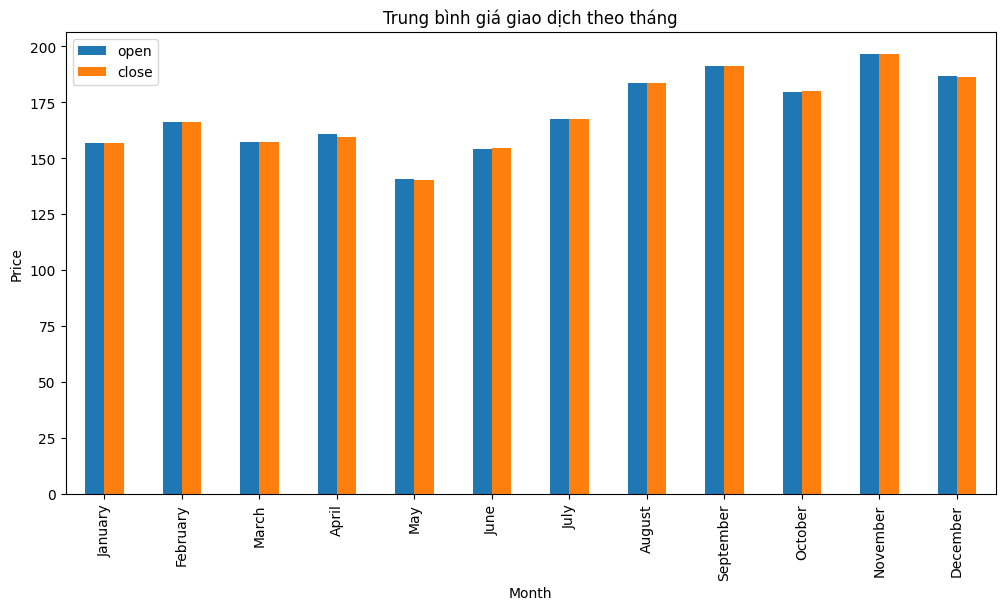

In [450]:
# Vẽ bar-plot mô tả
monthvise.plot(kind = 'bar', figsize=(12,6))
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Trung bình giá giao dịch theo tháng')
plt.show()

Theo quý

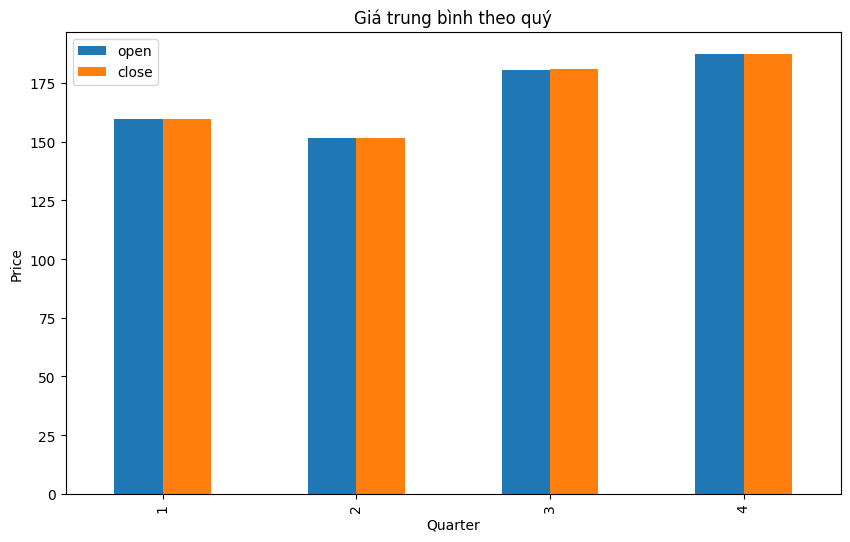

In [451]:
df.groupby(df['date'].dt.quarter)[['open','close']].mean().plot(kind='bar',figsize=(10,6))
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.title('Giá trung bình theo quý')
plt.show()

Theo năm

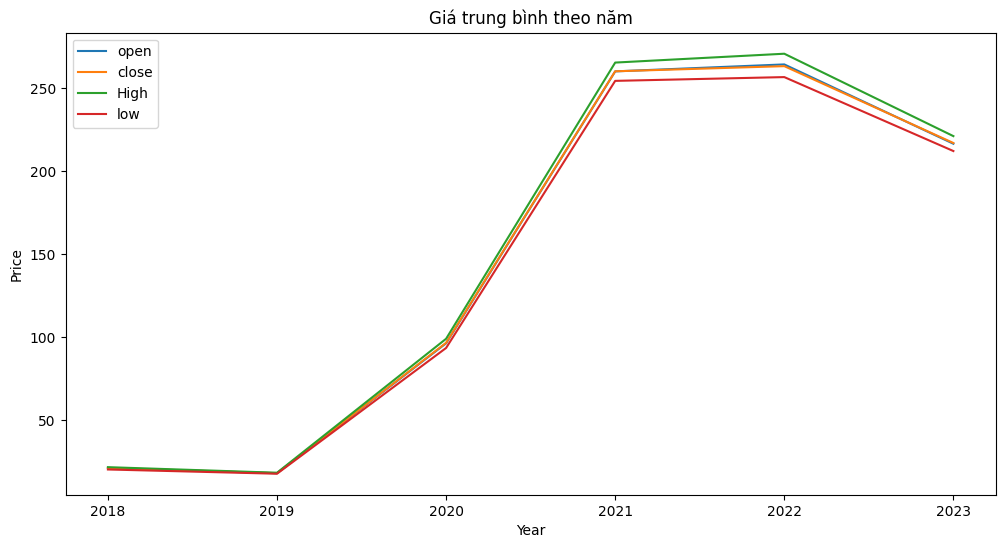

In [452]:
df.groupby(df['date'].dt.year)[['open','close','High','low']].mean().plot(kind='line',figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Giá trung bình theo năm')
plt.show()

Tương quan

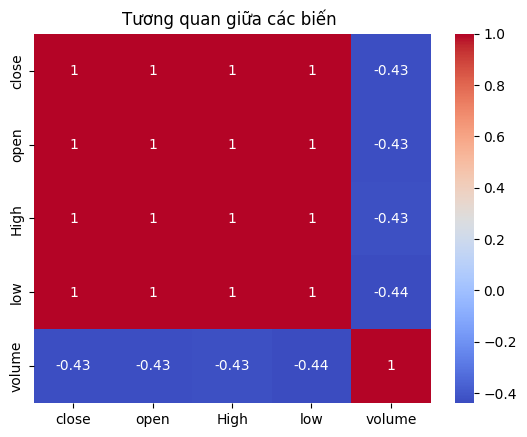

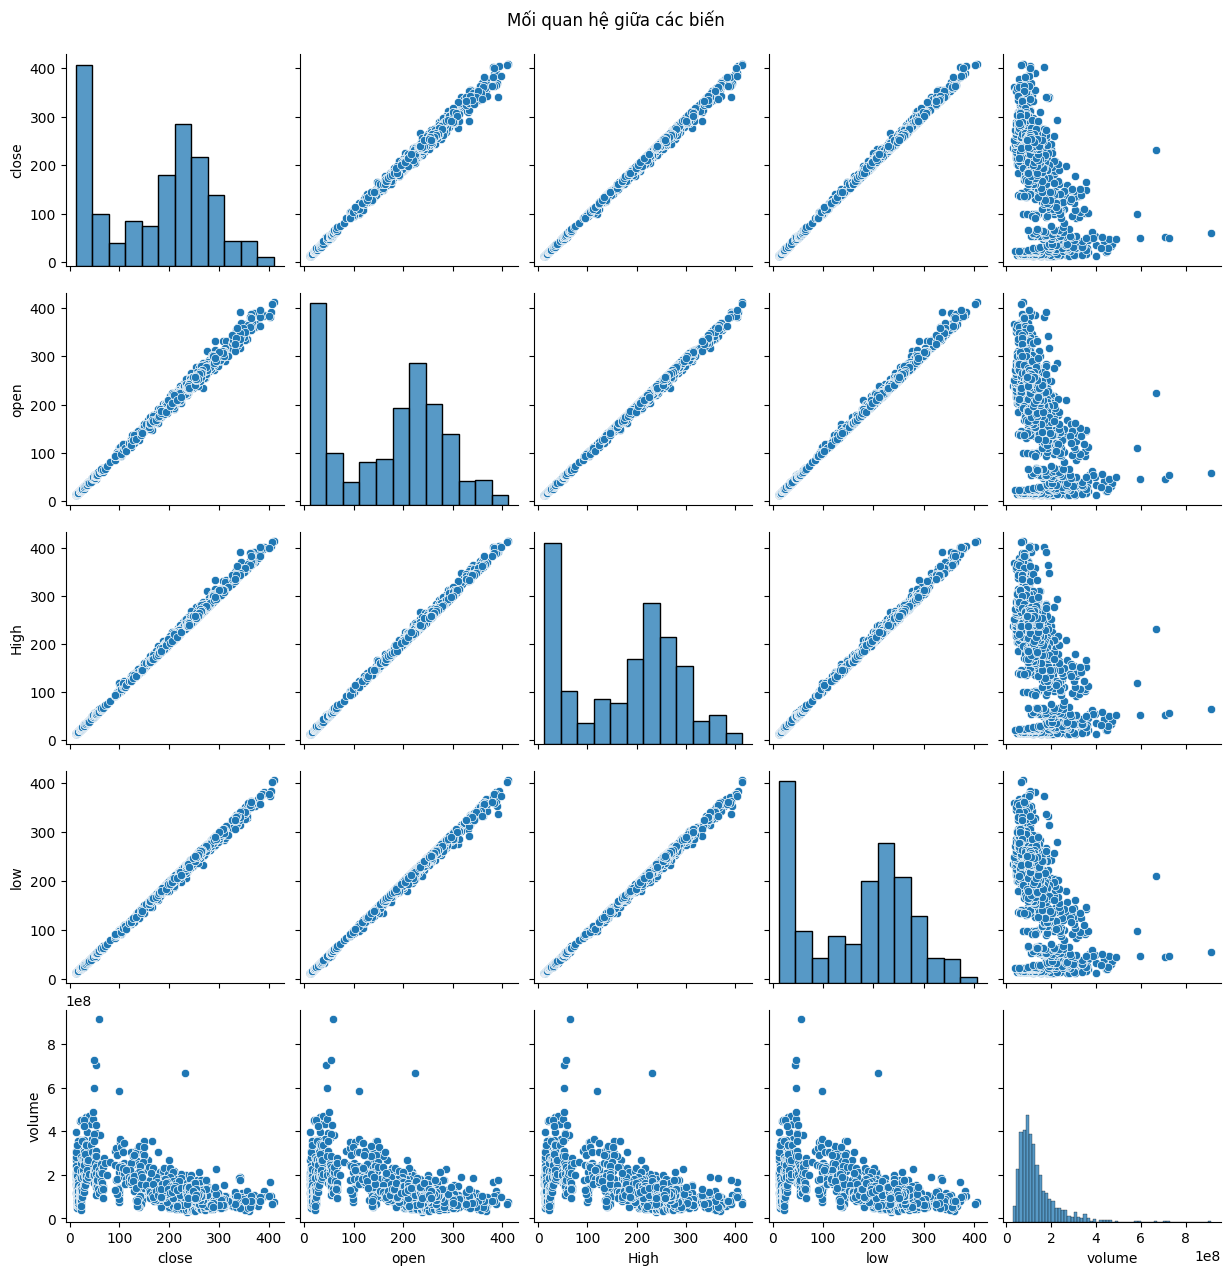

In [453]:
# Vẽ heatmap thể hiện độ tương quan giữa các biến
columns_to_corr = ['close', 'open', 'High', 'low','volume']
corr = df[columns_to_corr].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Tương quan giữa các biến ')
plt.show()
# Vẽ Pairplot 
sns.pairplot(data=df[columns_to_corr])
plt.suptitle('Mối quan hệ giữa các biến', y=1.02)
plt.show()

#### Nhận xét
* 
     1. Barplot giá trung bình theo tháng:
          * Hiển thị sự phân bố close price và open price theo tháng
          * Giá trị giữa 2 biến không có sự chênh lệch đáng kể

     2. Barplot giá trung bình theo quý:
          * Hiển thị sự phân bố close price và open price theo quý
          * Giá trị giữa 2 biến cũng không có sự chênh lệch đáng kể

     3. Lineplot giá trung bình thay đổi theo năm:
          * Hiển thị 4 biến close, open, high, low theo năm
          * Có sự tương quan thuận cao giữa các biến close, open, high và low, nhưng có sự tương quan nghịch yếu với volume

     4. Heatmap và pairplot:
          * Cho thấy mối quan hệ và tính tương quan giữa 5 biến
          * Các biến close, open,high và low có mối quan hệ tuyến tính với nhau. 
          * Volume không có sự tương quan chặt chẽ với bất kì biến nào

In [454]:
# Tạo dataframe mới bằng cột close và date
closedf = df[['date','close']]

<p style="color:#3498db"> Kiểm tra phân phối dữ liệu </p>

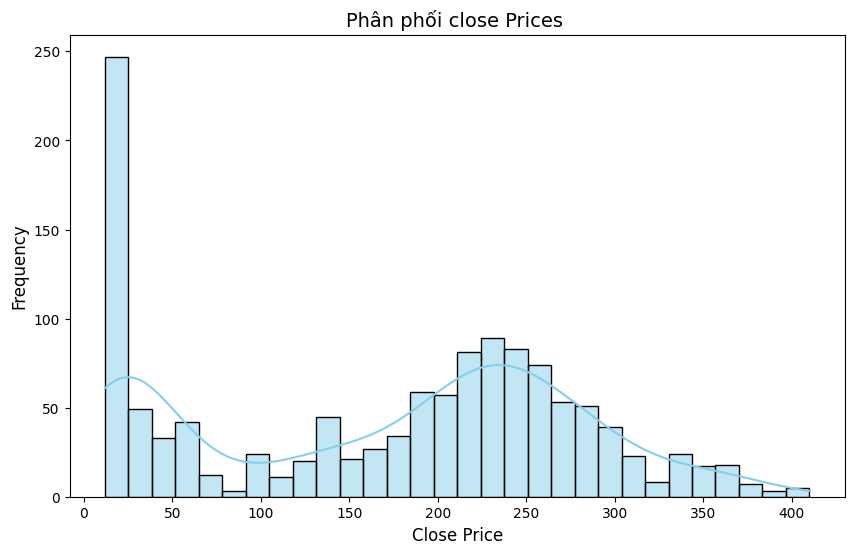

Độ xiên của dữ liệu: -0.14202842019334957


In [455]:
# Vẽ histogram cho cột 'close'
plt.figure(figsize=(10, 6))
sns.histplot(closedf['close'], bins=30, kde=True, color='skyblue')
plt.title('Phân phối close Prices ', fontsize=14)
plt.xlabel('Close Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Hiển thị đồ thị histogram
plt.show()

# Đo độ xiên của dữ liệu
skewness = df['close'].skew()
print(f"Độ xiên của dữ liệu: {skewness}")

##### Nhận xét : 
* Giá cổ phiểu chủ yếu nằm trong khoảng từ 150-300
* Thông qua Skewness và histogram có thể thấy giá cổ phiếu lệch phải nhẹ nhưng không đáng kể

<p style="color:#3498db"> Giá trung bình cổ phiếu năm 2023 theo tháng và theo quý</p>

In [456]:
# Tạo biến mới chứa dữ liệu 2023
close_stock_2023 = closedf[closedf['date'] > '2023-01-01'].copy()
print("Total date for prediction: ", close_stock_2023.shape[0])
print(close_stock_2023)

Total date for prediction:  246
           date       close
1013 2023-01-03  108.099998
1014 2023-01-04  113.639999
1015 2023-01-05  110.339996
1016 2023-01-06  113.059998
1017 2023-01-09  119.769997
...         ...         ...
1254 2023-12-18  252.080002
1255 2023-12-19  257.220001
1256 2023-12-20  247.139999
1257 2023-12-21  254.500000
1258 2023-12-22  252.539993

[246 rows x 2 columns]


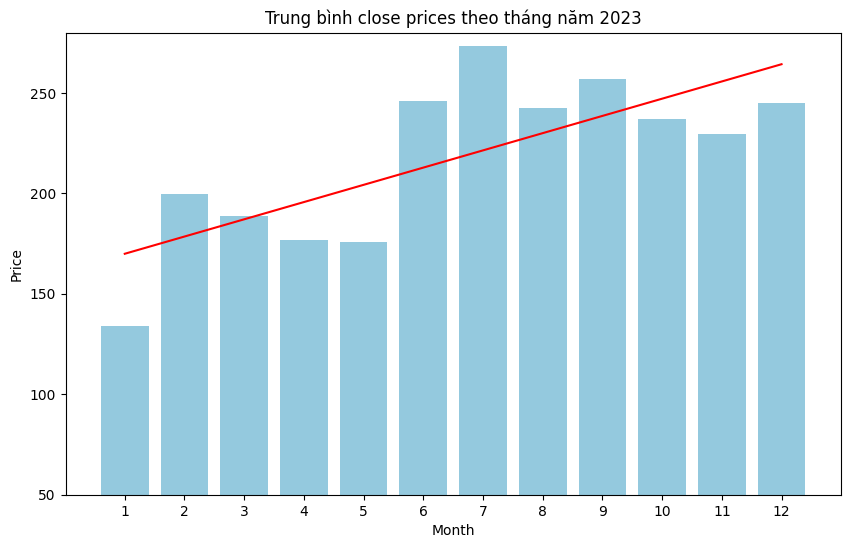

In [457]:
plt.figure(figsize=(10, 6))
sns.barplot(close_stock_2023.groupby(close_stock_2023['date'].dt.month)['close'].mean(), color="skyblue")
x_values = np.unique(close_stock_2023['date'].dt.month - 1)  # Lấy giá trị duy nhất của tháng
y_values = close_stock_2023.groupby(close_stock_2023['date'].dt.month)['close'].mean()
slope, intercept = np.polyfit(x_values, y_values, 1)
plt.plot(x_values, slope * x_values + intercept, color='red', linestyle='solid')
plt.xlabel('Month')
plt.ylabel('Price')
plt.ylim(50,280)
plt.title('Trung bình close prices theo tháng năm 2023')
plt.show()

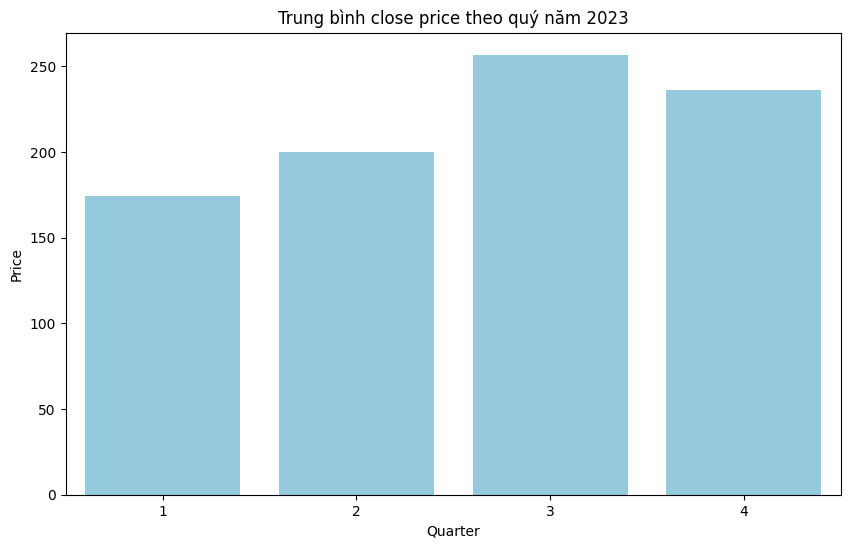

In [458]:
plt.figure(figsize=(10, 6))
sns.barplot(close_stock_2023.groupby(close_stock_2023['date'].dt.quarter)['close'].mean(), color="skyblue")
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.title('Trung bình close price theo quý năm 2023')
plt.show()

##### Nhận xét : 
* Giá cổ phiếu năm 2023 có sự xu hướng tăng trưởng đi lên từ đầu năm đến cuối năm
* Thông qua việc xem xét barplot theo quý, quý 3 chứng kiến sự tăng trưởng mạnh nhất của cổ phiếu

<p style="color:#3498db"> So sánh giá cổ phiếu trung bình các năm 2021,2022 và 2023</p>

In [459]:
closedf = df[['date','close']].copy()

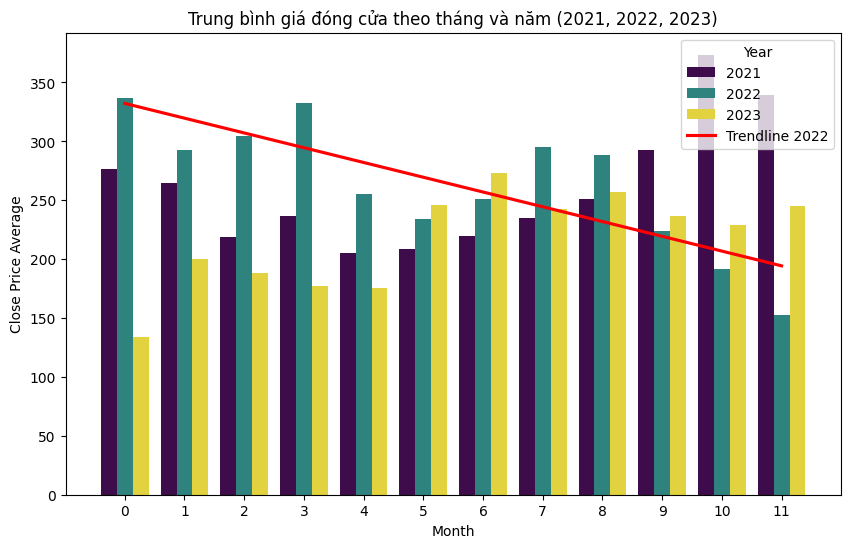

In [460]:
# Tạo biểu đồ so sánh giá đóng cửa trung bình theo tháng giữa các năm
closedf['Year'] = closedf['date'].dt.year
closedf['Month'] = closedf['date'].dt.month -1 
years_of_interest = [2021, 2022, 2023]
df_filtered = closedf[closedf['Year'].isin(years_of_interest)]
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Month', y='close', hue='Year', data=df_filtered.groupby(['Month', 'Year'])['close'].mean().reset_index(), palette='viridis')
sns.regplot(x='Month', y='close', data=df_filtered[df_filtered['Year'] == 2022].groupby(['Month'])['close'].mean().reset_index(),
            ci=None, scatter=False, ax=ax, line_kws={'linestyle': '-', 'color': 'red'},label='Trendline 2022')
plt.xlabel('Month')
plt.ylabel('Close Price Average')
plt.title('Trung bình giá đóng cửa theo tháng và năm (2021, 2022, 2023)')
plt.legend(title='Year',loc='upper right')
plt.show()

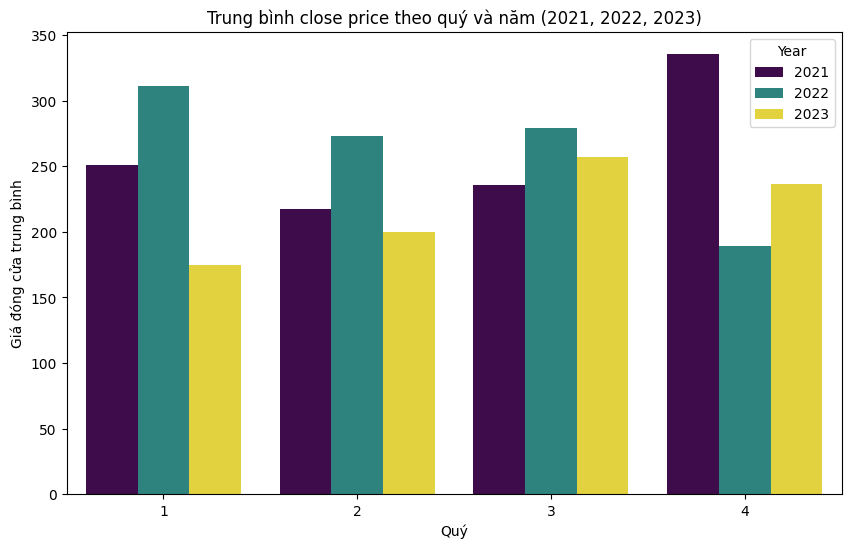

In [461]:
# Tạo biểu đồ so sánh giá đóng cửa trung bình theo quý giữa các năm
closedf['Quarter'] = closedf['date'].dt.quarter
years_of_interest = [2021, 2022, 2023]
df_filtered = closedf[closedf['Year'].isin(years_of_interest)]
plt.figure(figsize=(10, 6))
sns.barplot(x='Quarter', y='close', hue='Year', data=df_filtered.groupby(['Quarter', 'Year'])['close'].mean().reset_index(), palette='viridis')
plt.xlabel('Quý')
plt.ylabel('Giá đóng cửa trung bình')
plt.title('Trung bình close price theo quý và năm (2021, 2022, 2023)')
plt.show()

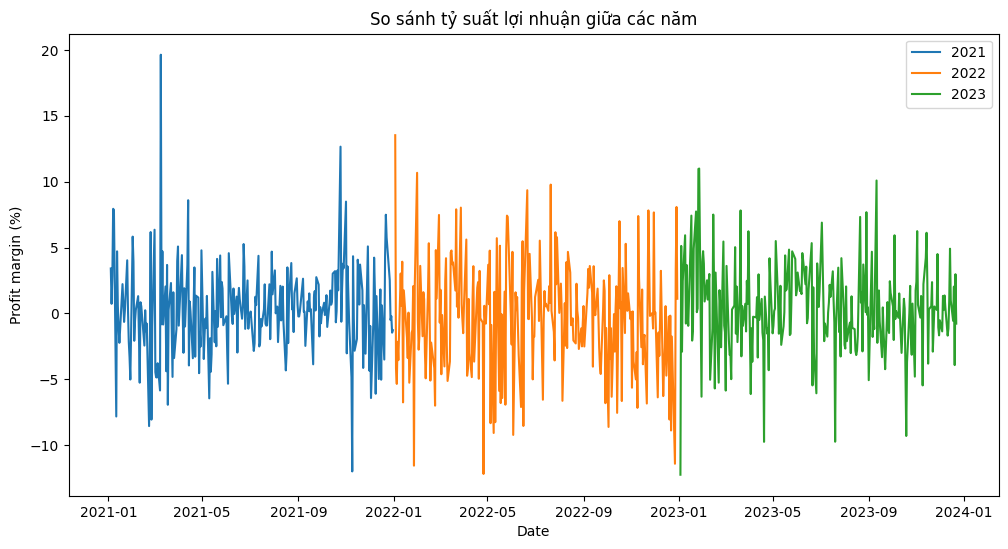

In [462]:
# Tính tỷ suất lợi nhuận dựa trên giá đóng cửa
closedf['Return'] = closedf['close'].pct_change() * 100

plt.figure(figsize=(12, 6))
for year in [2021, 2022, 2023]:
    data_year = closedf[closedf['date'].dt.year == year]
    plt.plot(data_year['date'], data_year['Return'], label=str(year))

plt.title('So sánh tỷ suất lợi nhuận giữa các năm')
plt.xlabel('Date')
plt.ylabel('Profit margin (%)')
plt.legend()
plt.show()

##### Nhận xét : 
* Với barplot : Các năm 2021 và 2023 đều có xu hướng tăng trưởng vào cuối năm. Năm 2022 lại có sự sụt giảm giá cổ phiếu vào cuối năm
* Với ProfitPlot : Năm 2022 có biên động lợi nhuận cao so với các năm khác

<a id="3.2"></a>
###  Kết luận 
    
Các kiểu dữ liệu cột đã được kiểm tra và kiểu ngày tháng đã được sửa theo từng đối tượng. <br>
Chuyển cột 'date' sang định dạng datetime

<a id='4'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> CHUỖI THỜI GIAN (TIME SERIES) </p>

Trong phần này, nhóm sẽ tiến hành xem xét các yếu tổ chuỗi thời gian có trong dữ liệu,song song với đó là việc xem xét sự giống và khác nhau giữa các mã cổ phiếu cùng nhóm ngành ô tô trên thể giới.

<a id="4.1"></a>
###  Các yếu tố của chuỗi thời gian
    
Sử dụng biểu đồ và bảng biểu để thể hiện yếu tố mùa vụ, xu hướng và chu kỳ của cổ phiếu.

In [463]:
closedfcopy = df[['date','close']].copy()

In [464]:
# Đặt cột date làm index
closedfcopy = closedfcopy.set_index('date')

Trung hạn 

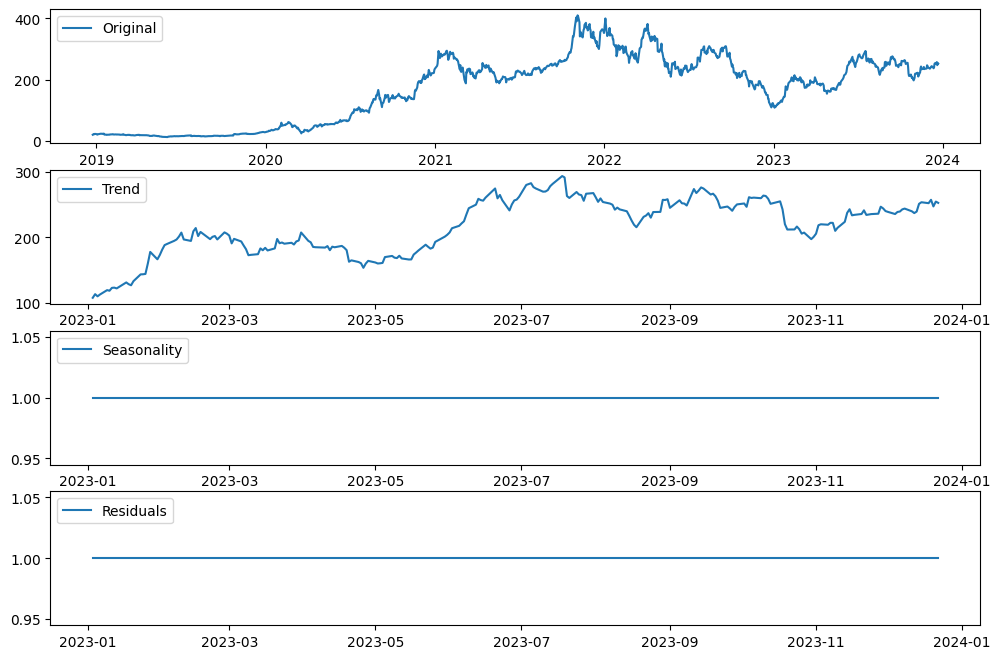

In [465]:
# Vẽ biểu đồ các yếu tố xu hướng năm 2023 
result = seasonal_decompose(closedfcopy['close'][closedfcopy.index > '2023-01-01'], model='multiplicative', period=1)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(closedfcopy['close'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.show()

Dài hạn

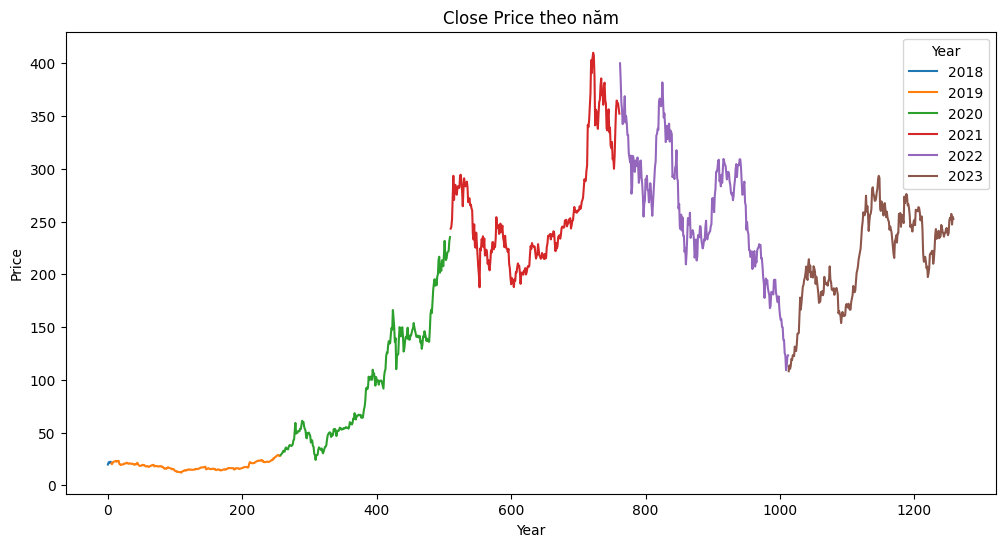

In [466]:
df.groupby(df['date'].dt.year)['close'].plot(figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Close Price theo năm')
plt.legend(title='Year')
plt.show()

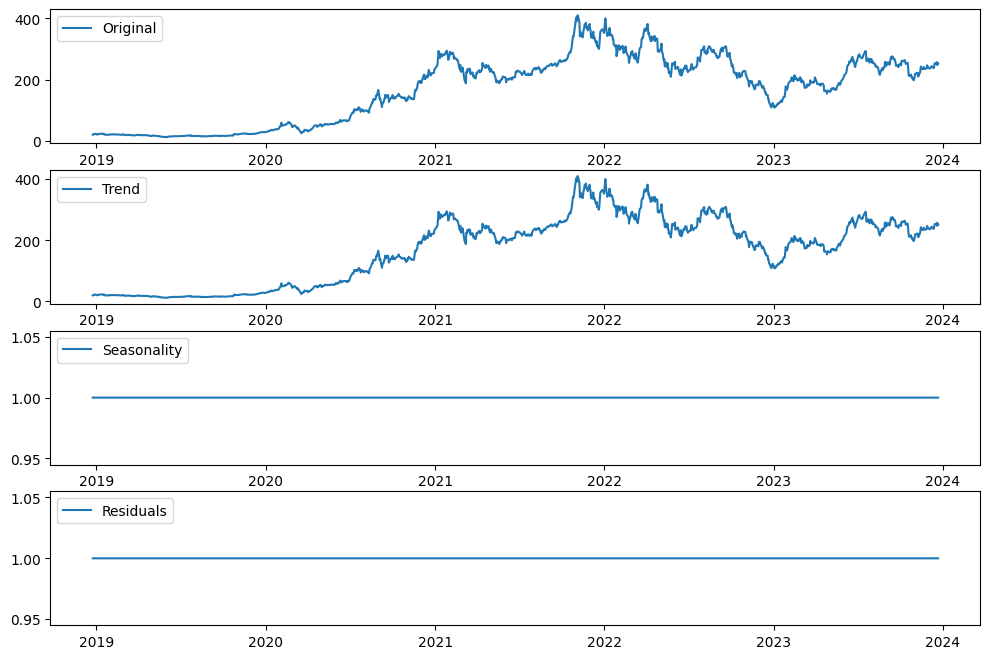

In [467]:
# Vẽ biểu đồ các yếu tố xu hướng qua các năm
result = seasonal_decompose(closedfcopy['close'], model='multiplicative', period=1)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(closedfcopy['close'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')


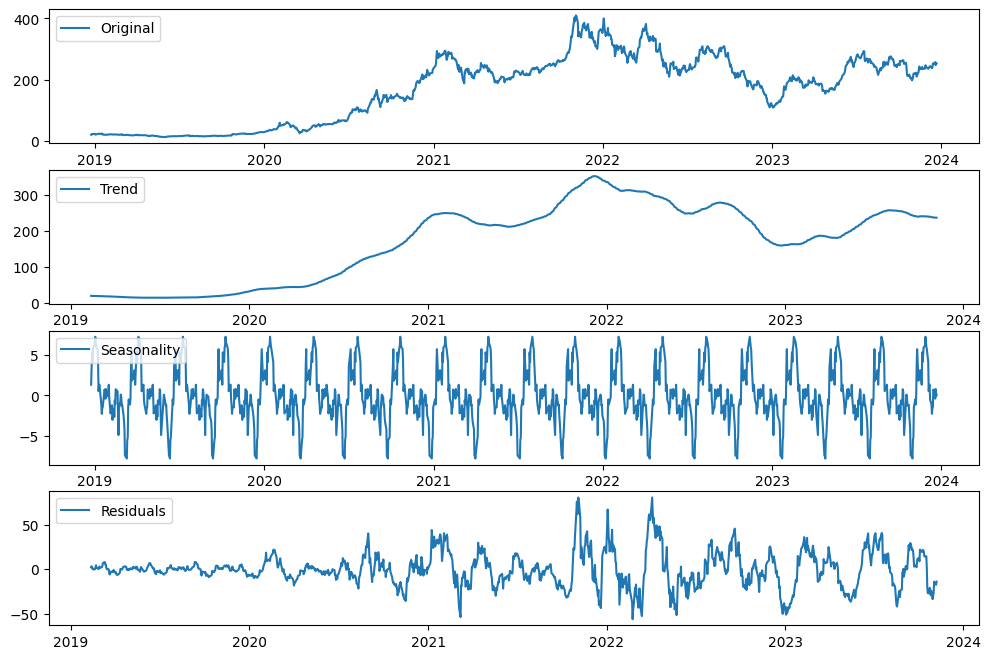

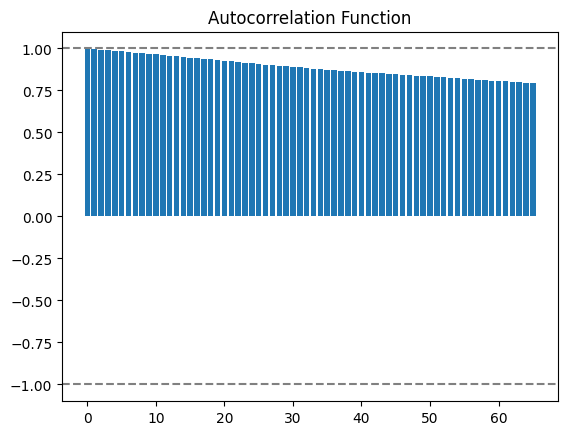

Lags với giá trị tự tương quan vượt ngưỡng 1: []


In [468]:
# Vẽ biểu đồ các yếu tố mùa vụ theo quý qua các năm 
result = seasonal_decompose(closedfcopy['close'], model='additive', period=65)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(closedfcopy['close'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.show()

# Tính giá trị tự tương quan
acf_values, conf_int = acf(closedfcopy['close'], nlags=65, alpha=0.05)
plt.bar(range(len(acf_values)), acf_values)
plt.axhline(y=1, linestyle='--', color='gray')  # Vẽ đường ngưỡng 1
plt.axhline(y=-1, linestyle='--', color='gray')  # Vẽ đường ngưỡng -1
plt.title('Autocorrelation Function')
plt.show()

# Tìm các lag khi giá trị tự tương quan vượt ngưỡng 1
lags_exceeding_threshold = np.where(np.abs(acf_values) > 1)[0]
print("Lags với giá trị tự tương quan vượt ngưỡng 1:", lags_exceeding_threshold)

##### Nhận xét:
* Về trung hạn (2023):
    1. Cho thấy có yéu tố xu hướng trong close price năm 2023 ==> Xu hướng tăng nhưng không rõ ràng
* Về dài hạn:
    1. Yếu tố mùa vụ không rõ ràng.
    2. Close Price có xu hướng tăng mạnh 2 lần vào cuối năm 2020 và cuối 2021. Ngược lại, Close Price cũng có đợt giảm mạnh là đầu 2021 đến cuối 2021,đầu 2022 đến đầu 2023

<a id="4.2"></a>
###  So sánh các mã cổ phiếu ngành ô tô thế giới

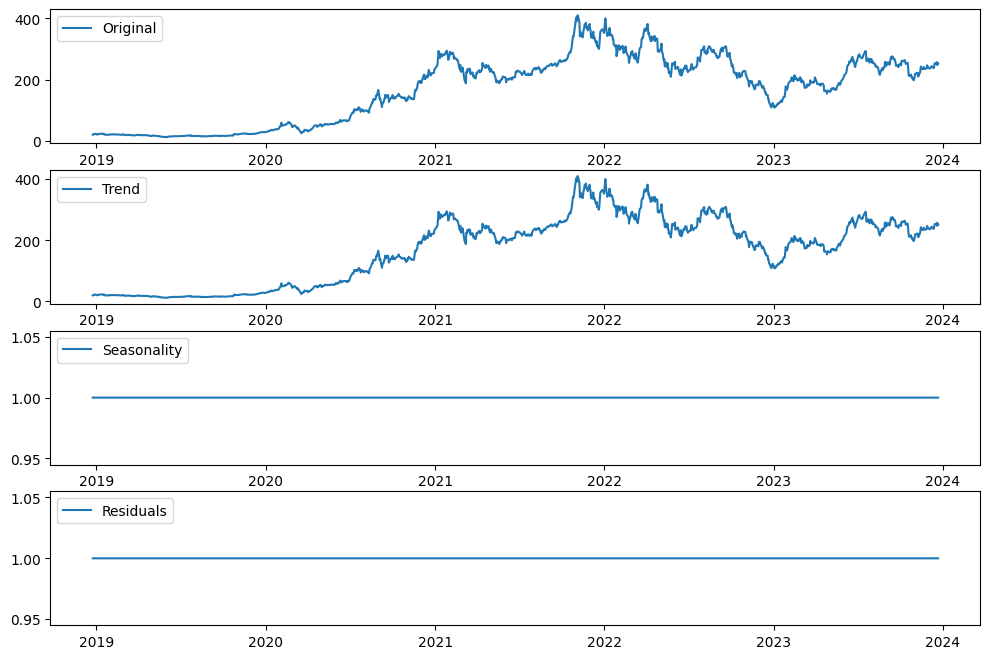

In [469]:

# Vẽ biểu đồ các yếu tố chuỗi thời gian năm 2022 theo quý
result = seasonal_decompose(closedfcopy['close'],
                             model='multiplicative', period=1)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(closedfcopy['close'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')

plt.show()

In [470]:
# Thực hiện một số biến đổi giống như đã làm trước đó đối với TESLA
df_ford = pd.read_csv('../dataset/FORD.csv')
df_ford= df_ford.rename(columns={'Date':'date','Open':'open','Hight':'hight','Low':'low','Close':'close','Adj Close':'adj_close','Volume':'volume'})
close_df_ford = df_ford[['close','date']].copy()
df_ford['date'],close_df_ford['date'] = pd.to_datetime(df_ford['date']),pd.to_datetime(close_df_ford['date'])
close_df_ford = close_df_ford.set_index('date')
close_df_ford.head()

,close
date,
2018-12-24,7.63
2018-12-26,7.85
2018-12-27,7.85
2018-12-28,7.81
2018-12-31,7.65


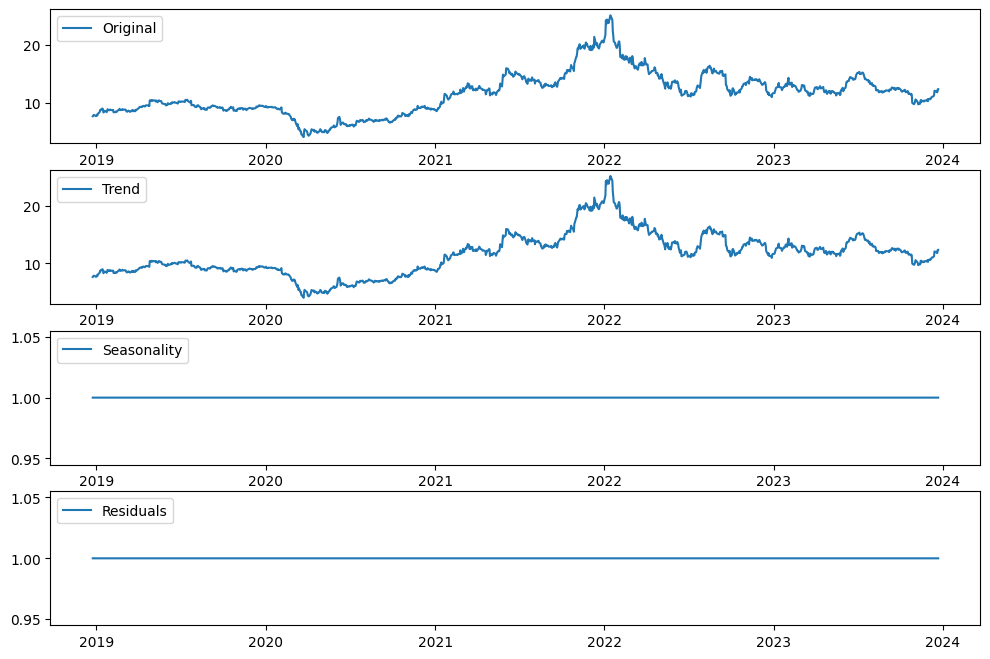

In [471]:
# Vẽ các biểu đồ thể hiện xu hướng của FORD
result_ford = seasonal_decompose(close_df_ford['close'],
                             model='multiplicative', period=1)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(close_df_ford['close'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result_ford.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result_ford.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result_ford.resid, label='Residuals')
plt.legend(loc='upper left')
plt.show()

In [472]:
# Thực hiện một số biến đổi giống như đã làm trước đó đối với VOW
df_wow = pd.read_csv('../dataset/VOW.DE.csv')
df_wow= df_wow.rename(columns={'Date':'date','Open':'open','Hight':'hight','Low':'low','Close':'close','Adj Close':'adj_close','Volume':'volume'})
df_wow = df_wow.dropna()
close_df_wow = df_wow[['close','date']].copy()
df_wow['date'],close_df_wow['date'] =pd.to_datetime(df_wow['date']), pd.to_datetime(close_df_wow['date'])
close_df_wow = close_df_wow.set_index('date')
close_df_wow.head()

,close
date,
2018-12-27,136.199997
2018-12-28,139.100006
2019-01-02,136.199997
2019-01-03,135.600006
2019-01-04,140.899994


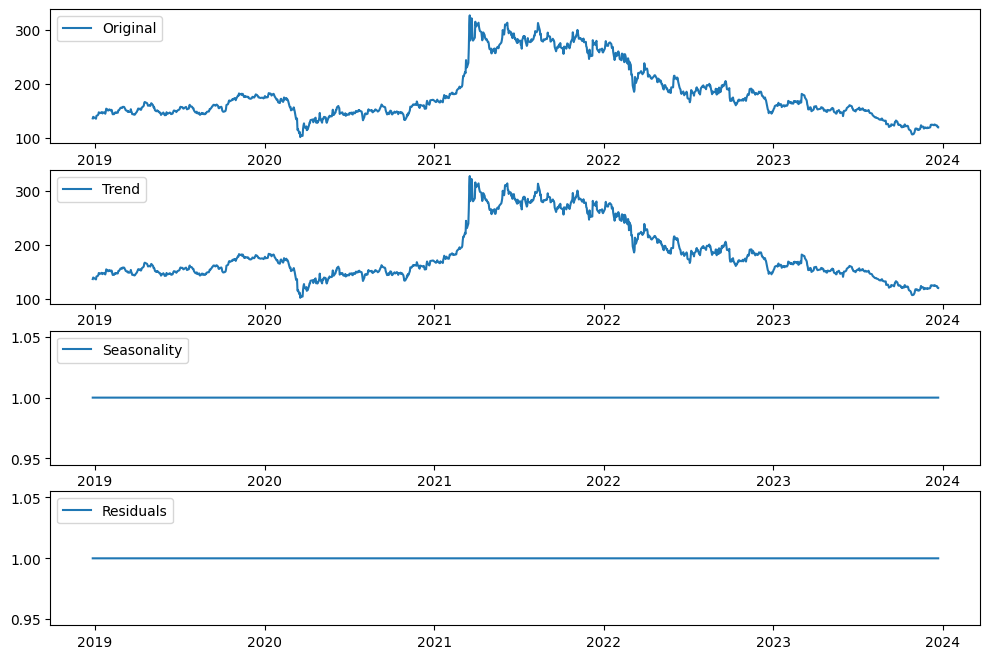

In [473]:
# Vẽ các biểu đồ thể hiện xu hướng, residual của WOW.DE 2019-2023
result_wow = seasonal_decompose(close_df_wow['close'],
                             model='multiplicative', period=1)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(close_df_wow['close'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result_wow.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result_wow.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result_wow.resid, label='Residuals')
plt.legend(loc='upper left')
plt.show()

In [474]:
# Thực hiện một số biến đổi giống như đã làm trước đó đối với TOYOTA
df_toyota = pd.read_csv('../dataset/TOYOTA.csv')
df_toyota= df_toyota.rename(columns={'Date':'date','Open':'open','Hight':'hight','Low':'low','Close':'close','Adj Close':'adj_close','Volume':'volume'})
df_toyota = df_toyota.dropna()
close_df_toyota = df_toyota[['close','date']].copy()
df_toyota['date'],close_df_toyota['date'] =pd.to_datetime(df_toyota['date']), pd.to_datetime(close_df_toyota['date'])
close_df_toyota = close_df_toyota.set_index('date')
close_df_toyota.head()

,close
date,
2018-12-24,111.809998
2018-12-26,113.720001
2018-12-27,115.480003
2018-12-28,116.339996
2018-12-31,116.080002


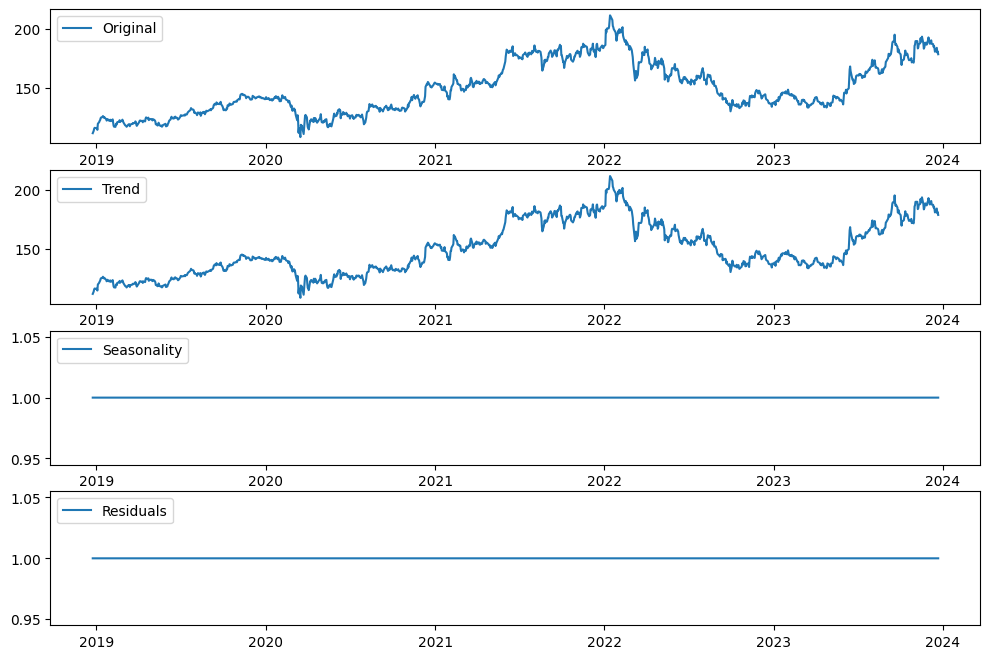

In [475]:
# Vẽ các biểu đồ thể hiện xu hướng, residual của TOYOTA 2019-2023
result_toyota = seasonal_decompose(close_df_toyota['close'],
                             model='multiplicative', period=1)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(close_df_toyota['close'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result_toyota.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result_toyota.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result_toyota.resid, label='Residuals')
plt.legend(loc='upper left')
plt.show()

In [476]:
# Thực hiện một số biến đổi giống như đã làm trước đó đối với BMW
df_bmw = pd.read_csv('../dataset/BMW.DE.csv')
df_bmw= df_bmw.rename(columns={'Date':'date','Open':'open','Hight':'hight','Low':'low','Close':'close','Adj Close':'adj_close','Volume':'volume'})
df_bmw = df_bmw.dropna()
close_df_bmw = df_bmw[['close','date']].copy()
df_bmw['date'],close_df_bmw['date'] =pd.to_datetime(df_bmw['date']), pd.to_datetime(close_df_bmw['date'])
close_df_bmw = close_df_bmw.set_index('date')
close_df_bmw.head()

,close
date,
2018-12-27,69.860001
2018-12-28,70.699997
2019-01-02,69.739998
2019-01-03,69.050003
2019-01-04,71.709999


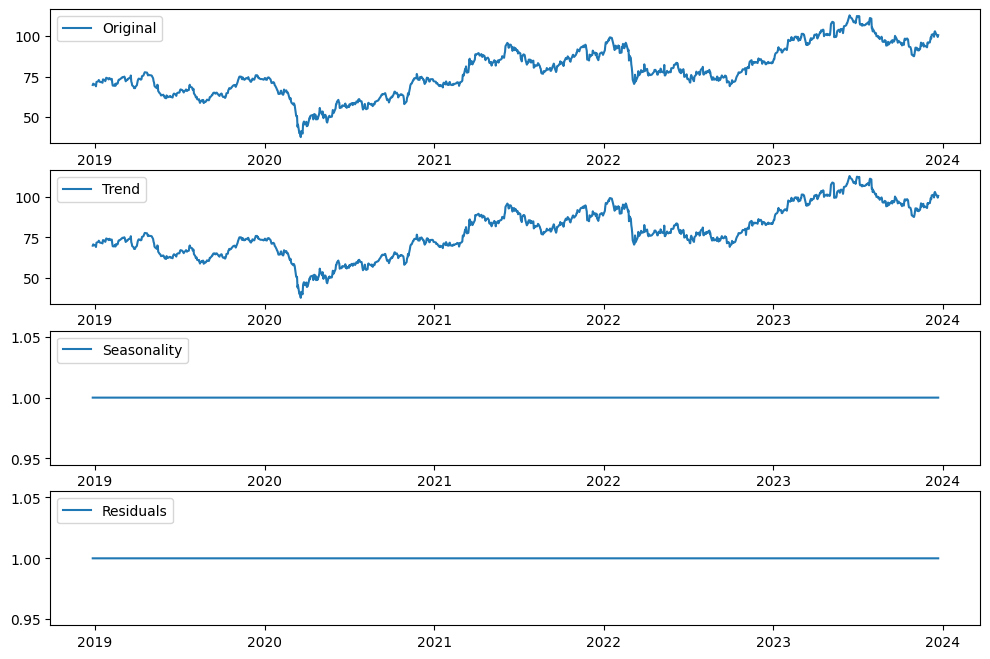

In [477]:
# Vẽ các biểu đồ thể hiện xu hướng, residual của BMW 2019-2023
result_bmw = seasonal_decompose(close_df_bmw['close'],
                             model='multiplicative', period=1)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(close_df_bmw['close'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result_bmw.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result_bmw.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result_bmw.resid, label='Residuals')
plt.legend(loc='upper left')
plt.show()

In [478]:
    # Tính giá trung bình theo năm cho từng công ty
Year_tesla = df.groupby(df['date'].dt.year)[['close']].mean()
Year_toyota = df_toyota.groupby(df_toyota['date'].dt.year)['close'].mean()
Year_wow = df_wow.groupby(df_wow['date'].dt.year)['close'].mean()
Year_ford = df_ford.groupby(df_ford['date'].dt.year)['close'].mean()
Year_bmw = df_bmw.groupby(df_bmw['date'].dt.year)['close'].mean()

# Tạo DataFrame supper_df
supper_df = pd.DataFrame({
    'Tesla': Year_tesla['close'],
    'Toyota': Year_toyota,
    'Wow': Year_wow,
    'Ford': Year_ford,
    'BMW': Year_bmw
})

In [479]:
supper_df

,Tesla,Toyota,Wow,Ford,BMW
date,,,,,
2018,21.390399,114.686000,137.650002,7.758000,70.279999
2019,18.235347,128.519921,156.188446,9.238651,68.863187
2020,96.665689,131.841067,149.573031,7.046996,60.498976
2021,259.998162,168.670833,261.884706,14.221587,83.389255
2022,263.093081,160.684223,200.720233,14.872470,80.451984
2023,216.866260,159.153292,143.166194,12.318537,99.415465


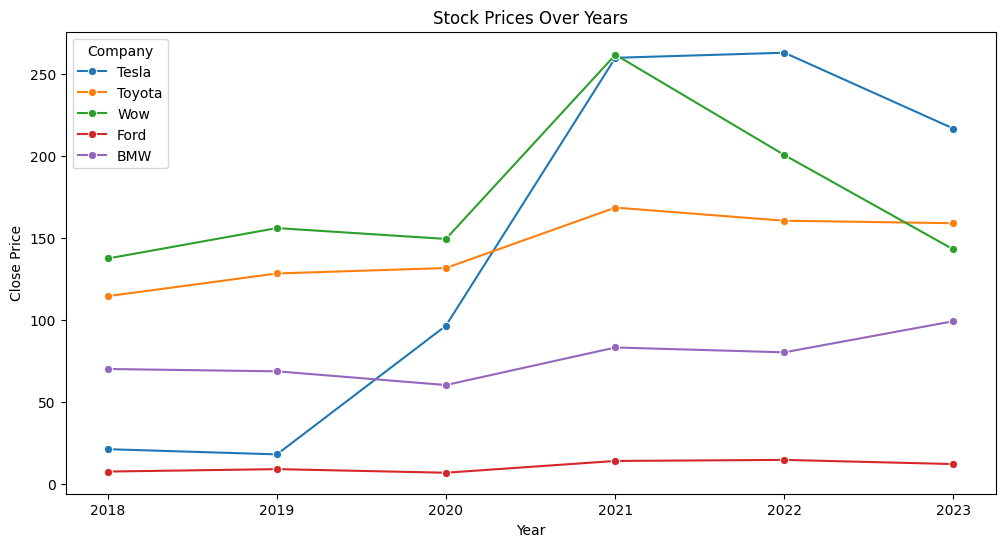

In [480]:
supper_df.index = pd.to_datetime(supper_df.index, format='%Y')
plt.figure(figsize=(12, 6))
sns.lineplot(data=supper_df.melt(ignore_index=False, var_name='Company', value_name='Close'), x='date', y='Close', hue='Company', marker='o')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Stock Prices Over Years')
plt.legend(title='Company', loc='upper left')
plt.show()

##### Nhận xét:
* Giống nhau : 
    1. Từ đầu năm 2020 đến cuối năm 2021 các mã cổ phiếu đều có xu hướng tăng trưởng, tăng nhanh nhất là Tesla và WOW
    2. Từ cuối năm 2021 đến 2023, các mã cổ phiếu ô tô có xu hưởng giảm so với đỉnh năm 2021
* Khác nhau: 
    1. Đối với Tesla, năm 2022 chưa chứng kiến xu hướng giảm,còn đối với các mã khác đã có sự sụt giảm so với đỉnh là cuối 2021.
    2. BMW và TOYOTA có sự tăng trưởng trở lại vào đầu năm 2023, các mã khác vẫn tiếp tục giảm

   <a id='5'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> TẠO MÔ HÌNH (MODELING) </p>

Ở phần này, nhóm sẽ tiến hành tạo model dựa trên dữ liệu được xử lý trước đó



<a id="5.1"></a>
### Moving Average naïve-step

In [481]:
closedf = df[['date','close']].copy()

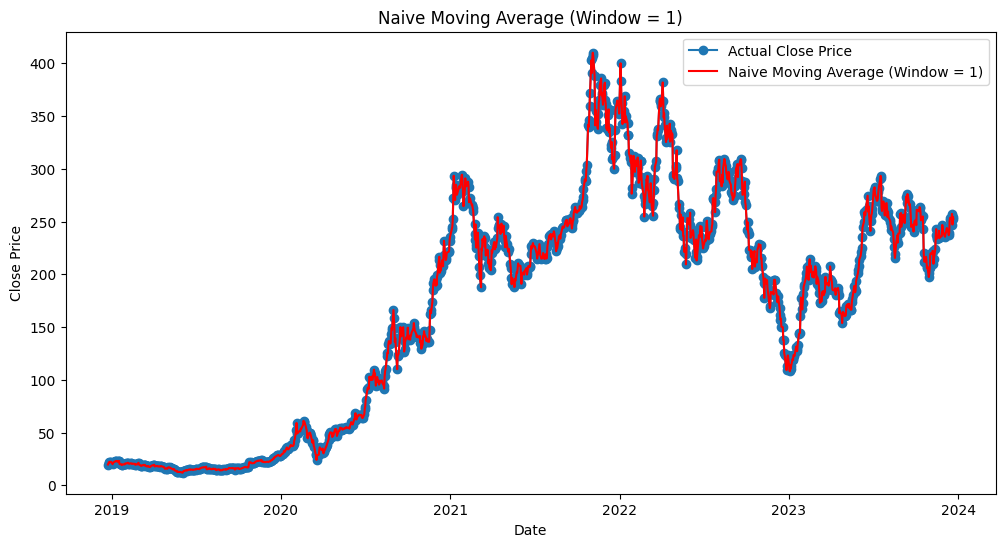

mean_absolute_error: 0.0
mean_absolute_percentage_error 0.0
mean_square_error: 0.0
r2_score: 1.0


In [482]:
window_size = 1

# Tính trung bình động naive
closedf['MA_Naive'] = closedf['close'].rolling(window=window_size).mean()
plt.figure(figsize=(12, 6))
plt.plot(closedf['date'], closedf['close'], label='Actual Close Price', marker='o', linestyle='-')
plt.plot(closedf['date'], closedf['MA_Naive'], label=f'Naive Moving Average (Window = {window_size})', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'Naive Moving Average (Window = {window_size})')
plt.legend()
plt.show()
# Các chỉ số đánh giá:
mae_naive = mean_absolute_error(closedf['close'],closedf['MA_Naive'])
mape_naive = mean_absolute_percentage_error(closedf['close'],closedf['MA_Naive'])
mse_naive = mean_squared_error(closedf['close'],closedf['MA_Naive'])
r2_naive = r2_score(closedf['close'],closedf['MA_Naive'])
print("mean_absolute_error:",mae_naive)
print("mean_absolute_percentage_error",mape_naive)
print("mean_square_error:",mse_naive)
print("r2_score:",r2_naive)

<a id="5.2"></a>
### Moving Average 3-step

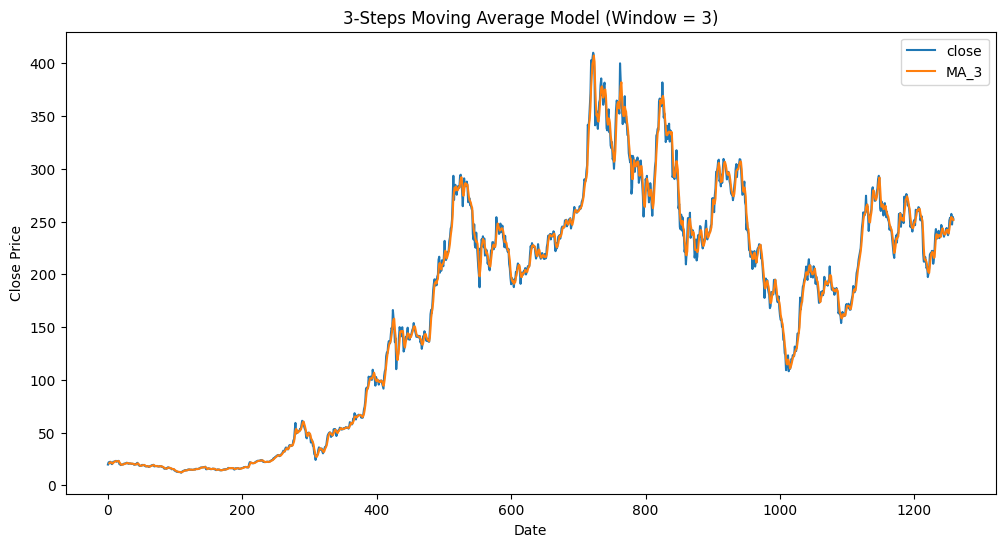

mean_absolute_error: 3.6621371797931586
mean_absolute_percentage_error 0.02198101895217465
mean_square_error: 31.664890763045435
r2_score: 0.9973073968630725


In [483]:
window_size = 3
closedf['MA_3'] = closedf['close'].rolling(window=window_size).mean()
closedf['close'].plot(figsize=(12,6),legend = TRUE)
closedf['MA_3'].plot(figsize=(12,6),legend = TRUE)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'3-Steps Moving Average Model (Window = {window_size})')
plt.legend()
plt.show()
# Chỉ số đánh giá
mae_3mva = mean_absolute_error(closedf['close'][2:],closedf['MA_3'].dropna())
mape_3mva = mean_absolute_percentage_error(closedf['close'][2:],closedf['MA_3'].dropna())
mse_3mva = mean_squared_error(closedf['close'][2:],closedf['MA_3'].dropna())
r2_3mva = r2_score(closedf['close'][2:],closedf['MA_3'].dropna())
print("mean_absolute_error:",mae_3mva)
print("mean_absolute_percentage_error",mape_3mva)
print("mean_square_error:",mse_3mva)
print("r2_score:",r2_3mva)

<a id="5.3"></a>
### Moving Average 6-step

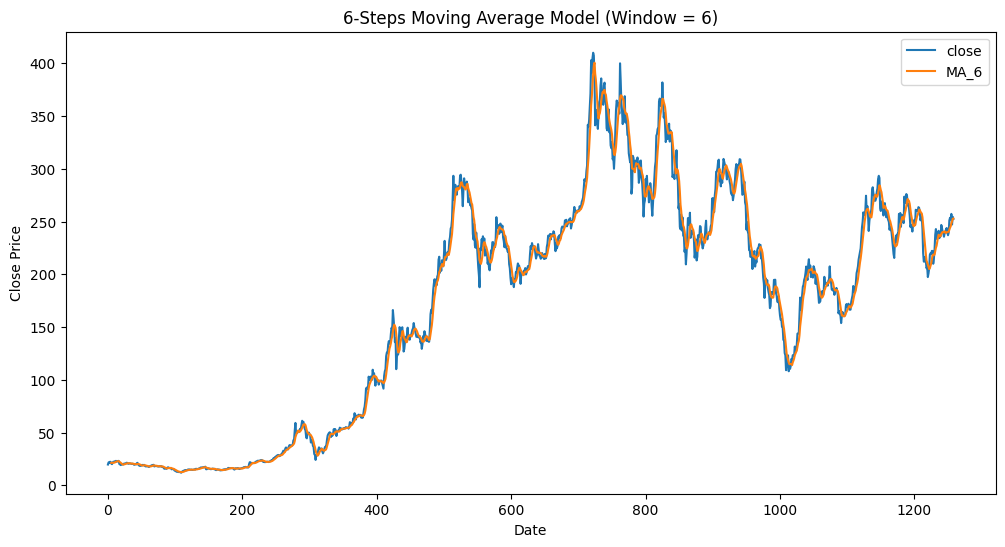

mean_absolute_error: 6.24197776076555
mean_absolute_percentage_error 0.037729482152751896
mean_square_error: 87.38094104623815
r2_score: 0.9925539826800457


In [484]:
window_size = 6
closedf['MA_6'] = closedf['close'].rolling(window=window_size).mean()
closedf['close'].plot(figsize=(12,6),legend = TRUE)
closedf['MA_6'].plot(figsize=(12,6),legend = TRUE)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'6-Steps Moving Average Model (Window = {window_size})')
plt.legend()
plt.show()
# Chỉ số đánh giá
mae_6mva = mean_absolute_error(closedf['close'][5:],closedf['MA_6'].dropna())
mape_6mva = mean_absolute_percentage_error(closedf['close'][5:],closedf['MA_6'].dropna())
mse_6mva = mean_squared_error(closedf['close'][5:],closedf['MA_6'].dropna())
r2_6mva = r2_score(closedf['close'][5:],closedf['MA_6'].dropna())
print("mean_absolute_error:",mae_6mva)
print("mean_absolute_percentage_error",mape_6mva)
print("mean_square_error:",mse_6mva)
print("r2_score:",r2_6mva)

<a id="5.4"></a>
### Simple Exponential Smoothing Alpha=0.1

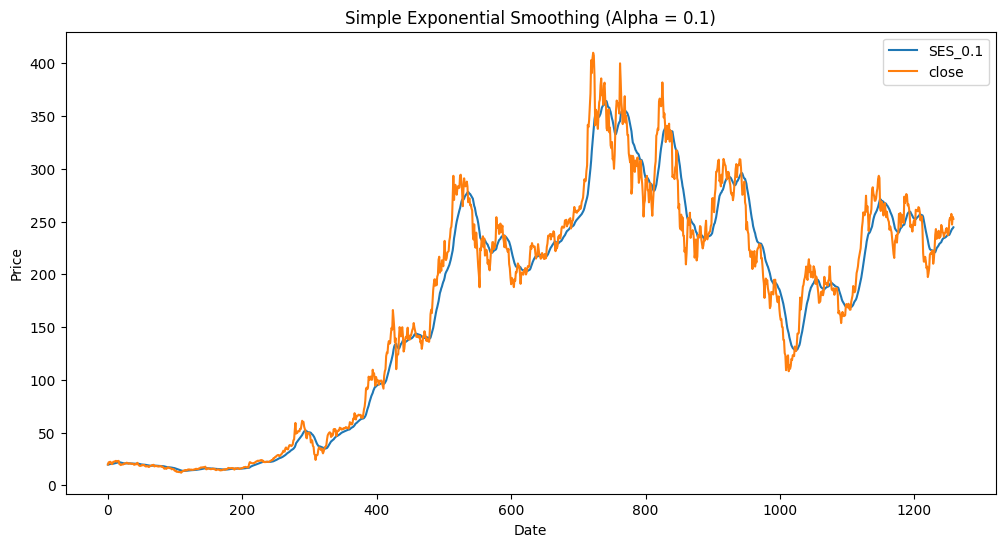

mean_absolute_error: 12.078178514499019
mean_absolute_percentage_error 0.07567013596587005
mean_square_error: 326.2479724949026
r2_score: 0.9722972739782327


In [485]:
model = SimpleExpSmoothing(closedf['close']).fit(smoothing_level=0.1)
closedf['SES_0.1'] = model.fittedvalues
closedf['SES_0.1'].plot(figsize=(12,6),legend = TRUE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Simple Exponential Smoothing (Alpha = 0.1)')
closedf['close'].plot(figsize=(12,6),legend = TRUE)
plt.show()

# Chỉ số đánh giá
mae_alpha01 = mean_absolute_error(closedf['close'],closedf['SES_0.1'])
mape_alpha01 = mean_absolute_percentage_error(closedf['close'],closedf['SES_0.1'])
mse_alpha01 = mean_squared_error(closedf['close'],closedf['SES_0.1'])
r2_alpha01 = r2_score(closedf['close'],closedf['SES_0.1'])
print("mean_absolute_error:",mae_alpha01)
print("mean_absolute_percentage_error",mape_alpha01)
print("mean_square_error:",mse_alpha01)
print("r2_score:",r2_alpha01)

<a id="5.5"></a>
### Simple Exponential Smoothing Alpha tối ưu

In [486]:
# Tạo hàm generate
def objective(trial):
    alpha = trial.suggest_float('alpha', 0.01, 0.99)
    model = SimpleExpSmoothing(closedf['close']).fit(smoothing_level=alpha)
    predictions = model.fittedvalues
    MAE = mean_absolute_error(closedf['close'], predictions.dropna())
    return MAE

In [487]:
# Tìm alpha tối ưu bằng trình tối ưu optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
best_alpha_optuna = study.best_params['alpha']
mae_best_ses = study.best_value
optimal_model_optuna = SimpleExpSmoothing(closedf['close']).fit(smoothing_level=best_alpha_optuna)
closedf['SES_Optimal_Optuna'] = optimal_model_optuna.fittedvalues

[I 2024-01-01 04:52:53,558] A new study created in memory with name: no-name-382a71e5-176c-4cac-ada9-1bd27f9ddb54
[I 2024-01-01 04:52:53,558] Trial 0 finished with value: 4.825689546278622 and parameters: {'alpha': 0.9704010678528828}. Best is trial 0 with value: 4.825689546278622.
[I 2024-01-01 04:52:53,578] Trial 1 finished with value: 10.183776036891059 and parameters: {'alpha': 0.1410019534017816}. Best is trial 0 with value: 4.825689546278622.
[I 2024-01-01 04:52:53,586] Trial 2 finished with value: 6.871335778418541 and parameters: {'alpha': 0.32056190771830917}. Best is trial 0 with value: 4.825689546278622.
[I 2024-01-01 04:52:53,594] Trial 3 finished with value: 5.140038576359341 and parameters: {'alpha': 0.6775698902359344}. Best is trial 0 with value: 4.825689546278622.
[I 2024-01-01 04:52:53,594] Trial 4 finished with value: 4.860483824077506 and parameters: {'alpha': 0.8704790165734679}. Best is trial 0 with value: 4.825689546278622.
[I 2024-01-01 04:52:53,616] Trial 5 fin

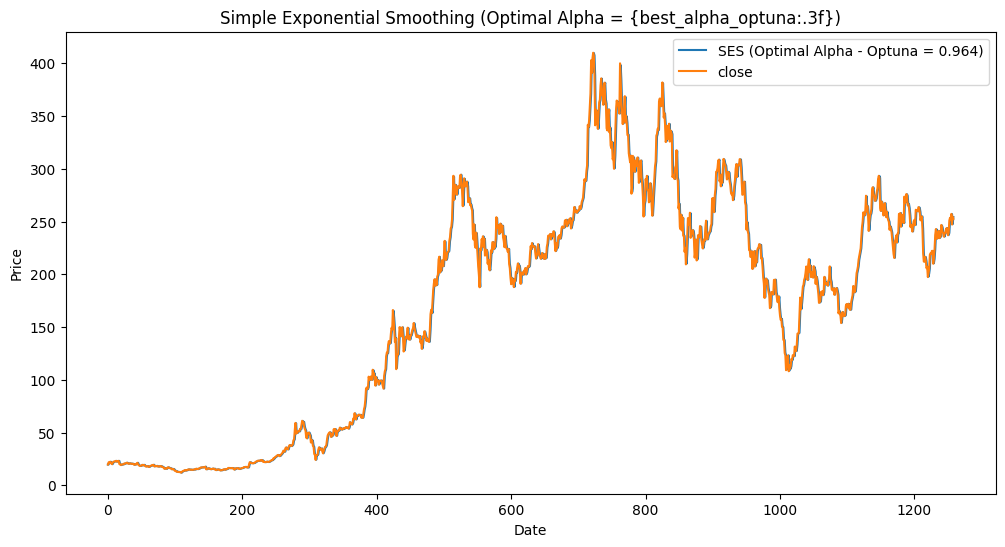

Optimal Alpha: 0.9635342664536655
Best MAE - Optuna: 4.825558040237848
mean_absolute_error: 4.825558040237848
mean_absolute_percentage_error 0.028892511046152477
mean_square_error: 58.2730843259201
r2_score: 0.9950518518868358


In [488]:
# Xây dựng biểu đồ
closedf['SES_Optimal_Optuna'].plot(figsize=(12,6),legend = TRUE, label=f'SES (Optimal Alpha - Optuna = {best_alpha_optuna:.3f})')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Simple Exponential Smoothing (Optimal Alpha = {best_alpha_optuna:.3f})')
closedf['close'].plot(figsize=(12,6),legend = TRUE)
plt.show()
# In giá trị alpha tối ưu và MAE tương ứng
print("Optimal Alpha:", best_alpha_optuna)
print("Best MAE - Optuna:", mae_best_ses)

mape_sesop = mean_absolute_percentage_error(closedf['close'],closedf['SES_Optimal_Optuna'] )
mse_sesop = mean_squared_error(closedf['close'],closedf['SES_Optimal_Optuna'] )
r2_sesop = r2_score(closedf['close'],closedf['SES_Optimal_Optuna'] )
print("mean_absolute_error:",mae_best_ses)
print("mean_absolute_percentage_error",mape_sesop)
print("mean_square_error:",mse_sesop)
print("r2_score:",r2_sesop)

<a id="5.6"></a>
### Holt Method hệ số chuẩn 

In [489]:
# Mô hình hệ số alpha và beta chuẩn
model = ExponentialSmoothing(closedf['close'], trend='add', damped=True).fit()
closedf['Holt_damped'] = model.fittedvalues

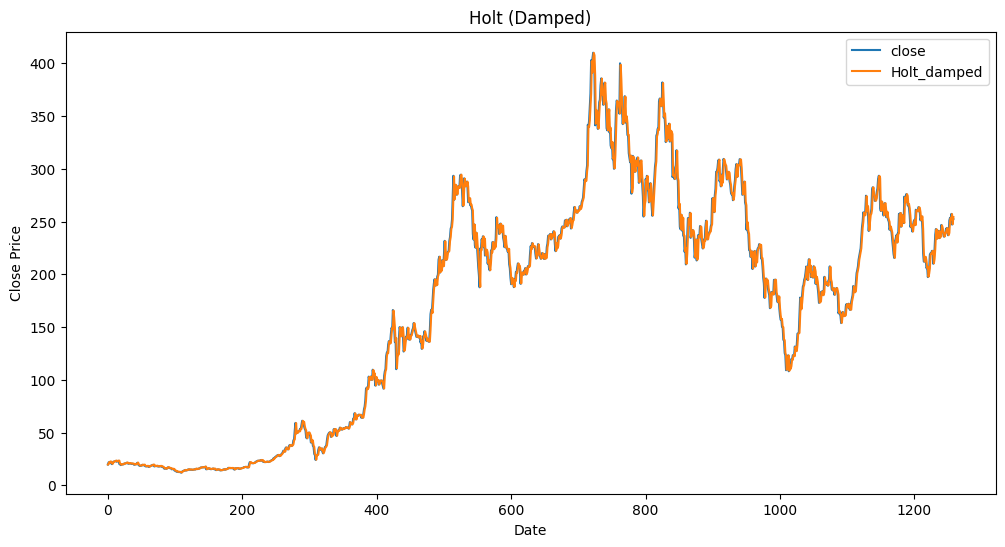

Mean Absolute Error (MAE): 4.82759035516011
mean_absolute_percentage_error 0.029105364691746974
mean_square_error: 58.26523336768943
r2_score: 0.9950525185360205


In [490]:
# Biểu đồ
closedf['close'].plot(figsize=(12,6),legend = TRUE)
closedf['Holt_damped'] .plot(figsize=(12,6),legend = TRUE)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'Holt (Damped)')
plt.legend()
plt.show()

# Tính chỉ số đánh giá
mae_holt = mean_absolute_error(closedf['close'], closedf['Holt_damped'].dropna())
print("Mean Absolute Error (MAE):", mae_holt)

mape_holt = mean_absolute_percentage_error(closedf['close'],closedf['Holt_damped'] )
mse_holt = mean_squared_error(closedf['close'],closedf['Holt_damped'] )
r2_holt = r2_score(closedf['close'],closedf['Holt_damped'] )
print("mean_absolute_percentage_error",mape_holt)
print("mean_square_error:",mse_holt)
print("r2_score:",r2_holt)

<a id="5.7"></a>
### Holt Method hệ số tối ưu 

In [491]:
# Xây dựng mô hình Holt với alpha và beta
def objective_holt(trial):
    alpha = trial.suggest_float('alpha', 0.01, 0.99)
    beta = trial.suggest_float('beta', 0.01, 0.99)
    model = ExponentialSmoothing(df['close'], trend='add', damped=True).fit(smoothing_level=alpha, smoothing_slope=beta)
    predictions = model.fittedvalues
    MAE = mean_absolute_error(df['close'], predictions.dropna())
    return MAE

In [492]:
# Tìm giá trị alpha và beta tối ưu
study = optuna.create_study(direction='minimize')
study.optimize(objective_holt, n_trials=200)
best_alpha_optuna = study.best_params['alpha']
best_beta_optuna = study.best_params['beta']
mae_holt_op = study.best_value

# Xây dựng mô hình Holt với alpha và beta tối ưu từ Optuna
optimal_model_optuna = ExponentialSmoothing(closedf['close'], trend='add', damped=True).fit(smoothing_level=best_alpha_optuna, smoothing_slope=best_beta_optuna)
closedf['Holt_Optimal_Optuna'] = optimal_model_optuna.fittedvalues

[I 2024-01-01 04:52:56,529] A new study created in memory with name: no-name-55d222ce-3e9f-407c-8f5c-ea59f7b47656
[I 2024-01-01 04:52:56,562] Trial 0 finished with value: 12.152559913041337 and parameters: {'alpha': 0.0847906384543363, 'beta': 0.6721347891348373}. Best is trial 0 with value: 12.152559913041337.
[I 2024-01-01 04:52:56,616] Trial 1 finished with value: 5.144332534846683 and parameters: {'alpha': 0.5546504392533761, 'beta': 0.44784562654005994}. Best is trial 1 with value: 5.144332534846683.
[I 2024-01-01 04:52:56,663] Trial 2 finished with value: 29.83739227024941 and parameters: {'alpha': 0.013247009992237229, 'beta': 0.2131348625547612}. Best is trial 1 with value: 5.144332534846683.
[I 2024-01-01 04:52:56,716] Trial 3 finished with value: 6.390026034116501 and parameters: {'alpha': 0.9326858709344561, 'beta': 0.9011625609408193}. Best is trial 1 with value: 5.144332534846683.
[I 2024-01-01 04:52:56,767] Trial 4 finished with value: 10.78639677018162 and parameters: {'

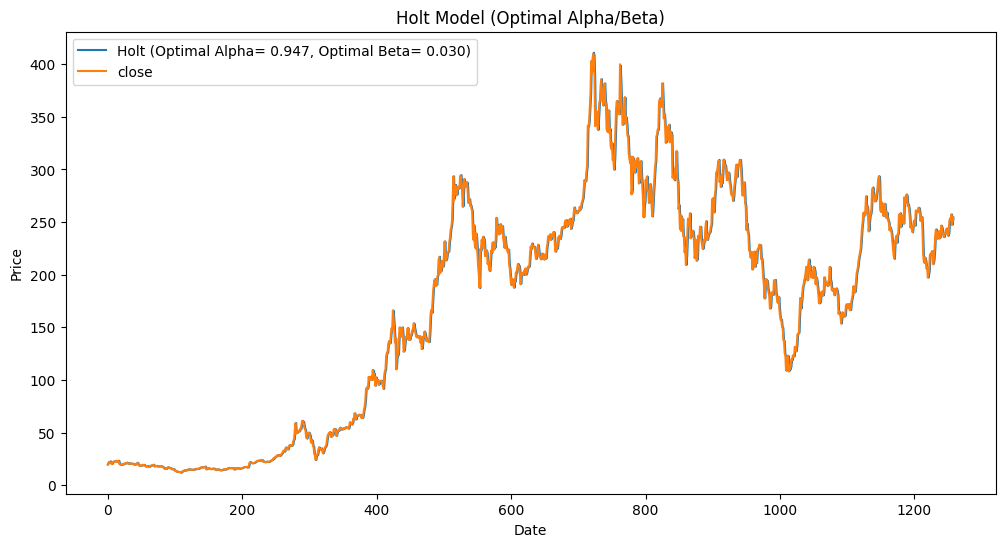

Optimal Alpha: 0.9470842997546218
Optimal Beta: 0.03034516224765812
Best MAE: 4.815635123477585
mean_absolute_percentage_error 0.02883274410081111
mean_square_error: 58.18795087019754
r2_score: 0.9950590808322944


In [493]:
# Xây dựng biểu đồ
closedf['Holt_Optimal_Optuna'].plot(figsize=(12,6),legend = TRUE, label=f'Holt (Optimal Alpha= {best_alpha_optuna:.3f}, Optimal Beta= {best_beta_optuna:.3f})')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt Model (Optimal Alpha/Beta)')
closedf['close'].plot(figsize=(12,6),legend = TRUE)
plt.show()
# In giá trị alpha và beta tối ưu và MAE tương ứng
print("Optimal Alpha:", best_alpha_optuna)
print("Optimal Beta:", best_beta_optuna)
print("Best MAE:", mae_holt_op)

mape_holt_op = mean_absolute_percentage_error(closedf['close'],closedf['Holt_Optimal_Optuna'] )
mse_holt_op = mean_squared_error(closedf['close'],closedf['Holt_Optimal_Optuna'] )
r2_holt_op = r2_score(closedf['close'],closedf['Holt_Optimal_Optuna'] )
print("mean_absolute_percentage_error",mape_holt_op)
print("mean_square_error:",mse_holt_op)
print("r2_score:",r2_holt_op)

<a id="5.8"></a>
### Holt Winter hệ số chuẩn

In [494]:
# Xây dựng mô hình Holt-Winters với hệ số chuẩn (damping) và mùa vụ (seasonal)
model = ExponentialSmoothing(df['close'], trend='add', seasonal='add', damped=True,seasonal_periods=7).fit()
closedf['Holt_wt'] = model.fittedvalues

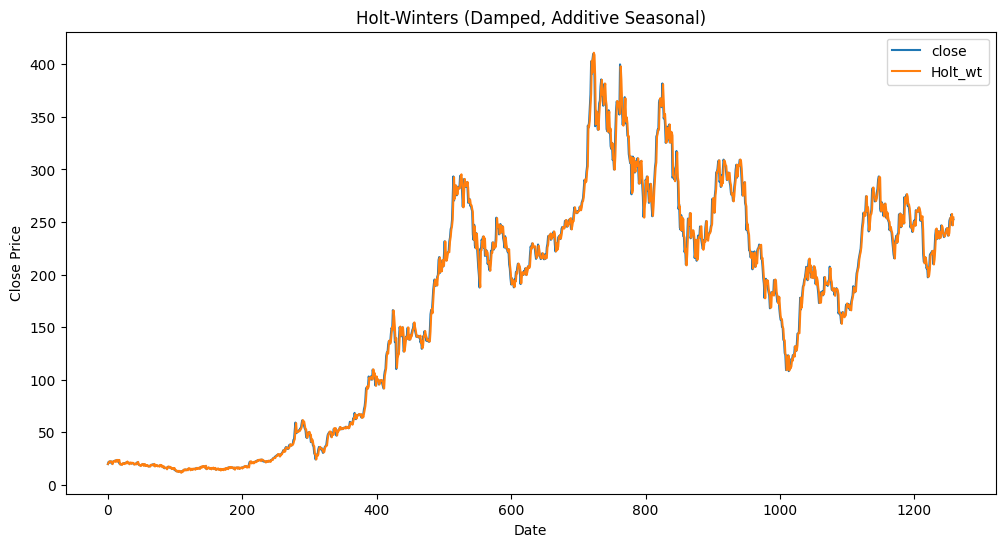

Mean Absolute Error (MAE): 4.849115387896121
mean_absolute_percentage_error 0.03118808895507695
mean_square_error: 57.91368538622555
r2_score: 0.9950823695641802


In [495]:
# Vẽ biểu đồ
closedf['close'].plot(figsize=(12,6),legend = TRUE)
closedf['Holt_wt'].plot(figsize=(12,6),legend = TRUE)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'Holt-Winters (Damped, Additive Seasonal)')
plt.legend()
plt.show()


# Tính chỉ số đánh giá
mae_holtwinter = mean_absolute_error(df['close'], closedf['Holt_wt'].dropna())
print("Mean Absolute Error (MAE):", mae_holtwinter)

mape_holtwinter = mean_absolute_percentage_error(closedf['close'],closedf['Holt_wt'] )
mse_holtwinter = mean_squared_error(closedf['close'],closedf['Holt_wt'] )
r2_holtwinter = r2_score(closedf['close'],closedf['Holt_wt'] )
print("mean_absolute_percentage_error",mape_holtwinter)
print("mean_square_error:",mse_holtwinter)
print("r2_score:",r2_holtwinter)

<a id="5.9"></a>
### Holt Winter hệ số tối ưu 

In [496]:
# Xây dựng hàm tối ưu
seasonal_periods = 12
def objective_holtwinter(trial):
    alpha = trial.suggest_float('alpha', 0.01, 0.99)
    beta = trial.suggest_float('beta', 0.01, 0.99)
    gamma = trial.suggest_float('gamma', 0, 0.99)
    seasonal = trial.suggest_categorical('seasonal', ['add', 'multiplicative'])
    
    model = ExponentialSmoothing(df['close'], trend='add', seasonal=seasonal, seasonal_periods=seasonal_periods, damped=True).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
    predictions = model.fittedvalues
    MAE = mean_absolute_error(df['close'], predictions.dropna())
    return MAE

In [497]:
# Tìm giá trị tối ưu cho alpha, beta, gamma, và seasonal
study = optuna.create_study(direction='minimize')
study.optimize(objective_holtwinter, n_trials=600)

# Lấy giá trị alpha, beta, gamma, và seasonal tối ưu
best_alpha_optuna = study.best_params['alpha']
best_beta_optuna = study.best_params['beta']
best_gamma_optuna = study.best_params['gamma']
best_seasonal_optuna = study.best_params['seasonal']

# Kiểm tra nếu MAE thấp nhất
mae_holtwinter_op = study.best_value

# Xây dựng mô hình Holt-Winters với hệ số tối ưu từ Optuna
optimal_model_optuna = ExponentialSmoothing(closedf['close'], trend='add', seasonal=best_seasonal_optuna, seasonal_periods=seasonal_periods, damped=True).fit(smoothing_level=best_alpha_optuna, smoothing_slope=best_beta_optuna, smoothing_seasonal=best_gamma_optuna)
closedf['Holt_Winters_Optimal'] = optimal_model_optuna.fittedvalues

[I 2024-01-01 04:53:06,978] A new study created in memory with name: no-name-f8419fd3-af06-4b78-bfee-342a1f148d32
[I 2024-01-01 04:53:07,034] Trial 0 finished with value: 36625.06542540392 and parameters: {'alpha': 0.2756704741013024, 'beta': 0.6936617936157774, 'gamma': 0.3799100528952999, 'seasonal': 'multiplicative'}. Best is trial 0 with value: 36625.06542540392.
[I 2024-01-01 04:53:07,070] Trial 1 finished with value: 8.182159693023797 and parameters: {'alpha': 0.34660349219782116, 'beta': 0.21331785568740907, 'gamma': 0.5655201437694766, 'seasonal': 'add'}. Best is trial 1 with value: 8.182159693023797.
[I 2024-01-01 04:53:07,113] Trial 2 finished with value: 322813928587.73254 and parameters: {'alpha': 0.5460824778911038, 'beta': 0.9322602296816128, 'gamma': 0.6820459696757751, 'seasonal': 'add'}. Best is trial 1 with value: 8.182159693023797.
[I 2024-01-01 04:53:07,148] Trial 3 finished with value: 9650.96938406534 and parameters: {'alpha': 0.8076092139509526, 'beta': 0.4359757

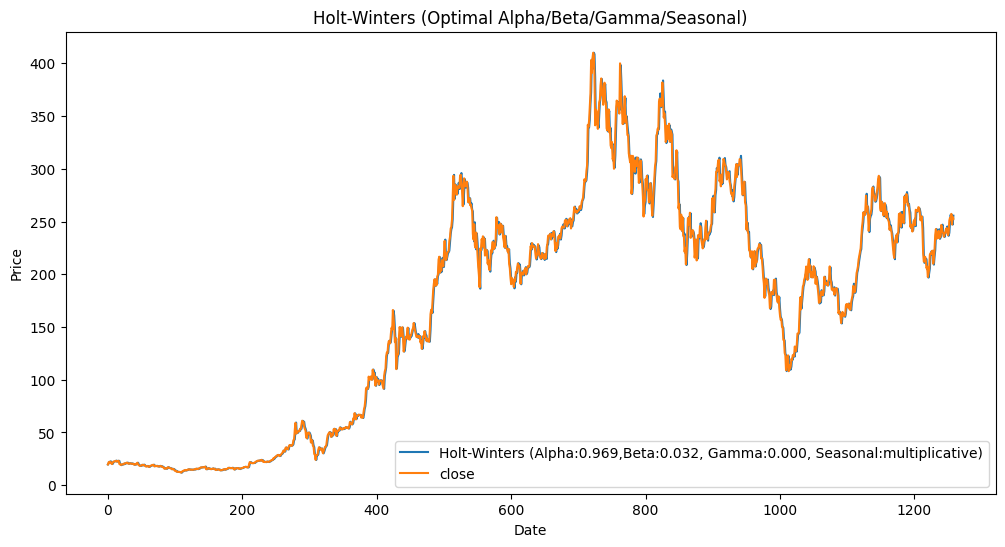

Optimal Alpha: 0.9686686814956593
Optimal Beta: 0.03209911924909427
Optimal Gamma: 4.3135043716050554e-05
Optimal Seasonal: multiplicative
Best MAE: 4.835168813217519
mean_absolute_percentage_error 0.028935336798953437
mean_square_error: 57.417430457644755
r2_score: 0.9951245081075044


In [498]:
# Biểu đồ
closedf['Holt_Winters_Optimal'].plot(figsize=(12,6),legend = TRUE, label=f'Holt-Winters (Alpha:{best_alpha_optuna:.3f},Beta:{best_beta_optuna:.3f}, Gamma:{best_gamma_optuna:.3f}, Seasonal:{best_seasonal_optuna})') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters (Optimal Alpha/Beta/Gamma/Seasonal)')
closedf['close'].plot(figsize=(12,6),legend = TRUE)
plt.show()

# In giá trị alpha, beta, gamma, và seasonal tối ưu và MAE tương ứng
print("Optimal Alpha:", best_alpha_optuna)
print("Optimal Beta:", best_beta_optuna)
print("Optimal Gamma:", best_gamma_optuna)
print("Optimal Seasonal:", best_seasonal_optuna)
print("Best MAE:", mae_holtwinter_op)

mape_holtwinter_op = mean_absolute_percentage_error(closedf['close'],closedf['Holt_Winters_Optimal'] )
mse_holtwinter_op = mean_squared_error(closedf['close'],closedf['Holt_Winters_Optimal'] )
r2_holtwinter_op = r2_score(closedf['close'],closedf['Holt_Winters_Optimal'] )
print("mean_absolute_percentage_error",mape_holtwinter_op)
print("mean_square_error:",mse_holtwinter_op)
print("r2_score:",r2_holtwinter_op)

<a id="5.10"></a>
### Holt Winter hệ số tối ưu - Test model

In [499]:
train_size = int(len(df[1013:]) * 0.8)
train, test = df[1013:-22]['close'], df[-22:]['close']

In [500]:
# Hàm mục tiêu cần tối ưu hóa
def objective_test(trial):
    alpha = trial.suggest_uniform('alpha', 0, 0.9)
    beta = trial.suggest_uniform('beta', 0, 0.9)
    gamma = trial.suggest_uniform('gamma', 0, 0.9)
    seasonal_period_values = [22]
    seasonal_period = trial.suggest_categorical('seasonal_period', seasonal_period_values)

    trend_values = ['add', 'multiplicative', 'additive']
    trend = trial.suggest_categorical('trend', trend_values)

    try:
        model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=seasonal_period,
                                     trend=trend, initialization_method='estimated',
                                     use_boxcox=True).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

        y_pred = model.forecast(len(test))

        if not np.isnan(y_pred).any():
            mae = mean_absolute_error(test, y_pred)

            # Lưu mô hình tốt nhất
            global best_model, best_mae
            if mae < best_mae:
                best_mae = mae
                best_model = model

            return mae
        else:
            return float('inf') 
    except Exception as e:
        print(f"Error: {e}")
        return float('inf') 

In [ ]:
# Biến để lưu mô hình tốt nhất
best_model = None
best_mae = float('inf')
# Tìm giá trị tối ưu của các tham số sử dụng Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective_test, n_trials=800)

# Lấy giá trị tối ưu
best_alpha = study.best_params['alpha']
best_beta = study.best_params['beta']
best_gamma = study.best_params['gamma']
best_seasonal_period = study.best_params['seasonal_period']
best_trend = study.best_params['trend']

# Huấn luyện lại mô hình tốt nhất
best_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=best_seasonal_period,
                                  trend=best_trend, initialization_method='estimated',
                                  use_boxcox=True).fit(smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)

# Dự đoán trên tập kiểm thử
y_pred = best_model.forecast(len(test))

# Đánh giá mô hình tốt nhất
mae = mean_absolute_error(test, y_pred)
mape = mean_absolute_percentage_error(test, y_pred)

print(f"Best Model - MAE: {mae}, Alpha: {best_alpha}, Beta: {best_beta}, Gamma: {best_gamma}, Seasonal Period: {best_seasonal_period}, Trend: {best_trend}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

# Hiển thị đồ thị dự đoán và thực tế
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

# Lưu mô hình tốt nhất
best_model.save("best_model.pkl")


<a id='6'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> ĐÁNH GIÁ VÀ SO SÁNH MÔ HÌNH </p>


In [501]:
models = ['Simple SMA_naive','Simple SMA_3','Simple SMA_6', 'Simple SMA_alpha01','Simple SMA_alpha_op','Holt','Holt_op', 'HoltWinter', 'HoltWinter_op']
mae_scores = [mae_naive,mae_3mva,mae_6mva,mae_alpha01,mae_best_ses,mae_holt,mae_holt_op,mae_holtwinter,mae_holtwinter_op]
mse_scores = [mse_naive,mse_3mva,mse_6mva,mse_alpha01,mse_sesop,mse_holt,mse_holt_op,mse_holtwinter,mse_holtwinter_op]
mape_scores = [mape_naive,mape_3mva,mape_6mva,mape_alpha01,mape_sesop,mape_holt,mape_holt_op,mape_holtwinter,mape_holtwinter_op]
r2_scores = [r2_naive,r2_3mva,r2_6mva,r2_alpha01,r2_sesop,r2_holt,r2_holt_op,r2_holtwinter,r2_holtwinter_op]

# Tạo bảng đánh giá
evaluation_df = pd.DataFrame({'Model': models, 'MSE': mse_scores, 'MAE': mae_scores, 'MAPE': mape_scores, 'R2 Score': r2_scores})
evaluation_df.set_index('Model', inplace=True)
print(evaluation_df)

                            MSE        MAE      MAPE  R2 Score
Model                                                         
Simple SMA_naive       0.000000   0.000000  0.000000  1.000000
Simple SMA_3          31.664891   3.662137  0.021981  0.997307
Simple SMA_6          87.380941   6.241978  0.037729  0.992554
Simple SMA_alpha01   326.247972  12.078179  0.075670  0.972297
Simple SMA_alpha_op   58.273084   4.825558  0.028893  0.995052
Holt                  58.265233   4.827590  0.029105  0.995053
Holt_op               58.187951   4.815635  0.028833  0.995059
HoltWinter            57.913685   4.849115  0.031188  0.995082
HoltWinter_op         57.417430   4.835169  0.028935  0.995125


<a id='7'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#000000;font-family:candaralight;color:#ffffff;font-size:175%;text-align:center;border-radius:10px 10px;"> KẾT LUẬN VÀ HƯỚNG PHÁT TRIỂN </p>
